Christian Braga - Loris Salsi 

Statistical Learning project

<h1> PROJECT OVERVIEW </H1>

Project Purpose
The primary goal of this project is to analyze and predict power generation data from two solar power plants. We aim to:

Predict power generation.
Identify the need for panel cleaning or maintenance.

<h2> Dataset Description </h2>

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

<h2>Index</h2>

1. Exploratory data analysis

2. Statistical models:
   - Multiple Linear Regression
   - Forward Stepwise Selection
   - Lasso Regression 
   - Decision Tree Regression 
   - Random Forest Regression
   - Multinomial Logistic Regression
   - Linear Discriminant Analysis (LDA)
   - K-Nearest Neighbors (KNN) 
   - Random Forest Classifier



<h2>Importing Libraries </h2>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<H2>Exploratory Data Analysis </h2>

<h3>Loading The Datasets</h3>

In [12]:
p1_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')
#p2_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')
p1_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
#p2_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

<h3> EDA Generation Data Plant 1</h3>

<h3>First Look </h3>

In [13]:
#first 5 rows of the generation data for plant 1
p1_gen_df.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [14]:
#last 5 rows of the generation data for plant 1
p1_gen_df.tail(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
67693       4157.0     520758.0  
67694       3931.0  121131356.0  
67695       4322.0    2427691.0  
67696       4218.0  106896394.0  
67697       4316.0  209335741.0

<h3>Shape and Size</h3>

In [15]:
# shape and size of the dataset
p1_gen_shape = p1_gen_df.shape
p1_gen_size = p1_gen_df.size
print(f'The Generation Data for the plant 1 is composed by: {p1_gen_shape[0]} rows and {p1_gen_shape[1]} columns.\nFor a total of {p1_gen_size} values')

The Generation Data for the plant 1 is composed by: 67698 rows and 7 columns.
For a total of 473886 values


<h3>Dataframe Info</h3>

In [16]:
#information about the Generation Data for the plant 1
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


The dataframe info command give us useful information about the type of the features, the number of null-values and the dimension of the dataset. We can simply notice that for each columns of the dataset the number of non-null values is the same of the number of rows of the entire dataset, it means that we don't have null values.

<h3>Missing Data </h3>

In [17]:
#to be sure, we can still check for null values
p1_gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [18]:
#statistics description of the generation data for the plant 1
p1_gen_df.describe().T

count          mean           std        min           25%  \
PLANT_ID     67698.0  4.136001e+06  0.000000e+00  4136001.0  4.136001e+06   
DC_POWER     67698.0  2.467020e+02  3.705696e+02        0.0  0.000000e+00   
AC_POWER     67698.0  2.412778e+02  3.621121e+02        0.0  0.000000e+00   
DAILY_YIELD  67698.0  3.294890e+03  2.919448e+03        0.0  2.727500e+02   
TOTAL_YIELD  67698.0  6.589448e+08  7.296678e+08        0.0  1.996494e+07   

                     50%           75%           max  
PLANT_ID       4136001.0  4.136001e+06  4.136001e+06  
DC_POWER             0.0  4.465917e+02  1.420933e+03  
AC_POWER             0.0  4.382150e+02  1.385420e+03  
DAILY_YIELD       2911.0  5.534000e+03  9.873000e+03  
TOTAL_YIELD  282627587.0  1.348495e+09  2.247916e+09

<h3>Column Names</h3>

In [19]:
#adjusting the name of the columns in order to make it easier to work with
p1_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [502]:
#adjusting the name of the columns in order to make it easier to work with
p2_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p2_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

<h3>Feature Analysis</h3>

In [23]:
#date_time
p1_gen_df['date_time']

0        2020-05-15 00:00:00
1        2020-05-15 00:00:00
2        2020-05-15 00:00:00
3        2020-05-15 00:00:00
4        2020-05-15 00:00:00
                ...         
67693    2020-06-17 23:45:00
67694    2020-06-17 23:45:00
67695    2020-06-17 23:45:00
67696    2020-06-17 23:45:00
67697    2020-06-17 23:45:00
Name: date_time, Length: 67698, dtype: object

In the date time column we have the values every 15 min from 15-05-2020 0:00 until 17-06-2020 23:45. In order to make it easier to work with dates we convert them to time date format

In [24]:
#transoform the variable date_time in format date time
p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'],format='%Y-%m-%d %H:%M:%S')
p1_gen_df['date_time'].dtype

dtype('<M8[ns]')

In [25]:
p1_gen_df['date_time']

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
67693   2020-06-17 23:45:00
67694   2020-06-17 23:45:00
67695   2020-06-17 23:45:00
67696   2020-06-17 23:45:00
67697   2020-06-17 23:45:00
Name: date_time, Length: 67698, dtype: datetime64[ns]

I create a function to figure out which days we have observations for:

In [26]:
#extract all the days that are observed in our dataset
def days_analyzed():
    copy1 = p1_gen_df.copy()
    copy1['day_month_year'] = copy1['date_time'].dt.strftime('%d-%m-%Y')
    date_list = []
    for i in copy1['day_month_year']:
        if i not in date_list:
            date_list.append(i)
    return date_list
days_analyzed()

['15-05-2020',
 '16-05-2020',
 '17-05-2020',
 '18-05-2020',
 '19-05-2020',
 '20-05-2020',
 '21-05-2020',
 '22-05-2020',
 '23-05-2020',
 '24-05-2020',
 '25-05-2020',
 '26-05-2020',
 '27-05-2020',
 '28-05-2020',
 '29-05-2020',
 '30-05-2020',
 '31-05-2020',
 '01-06-2020',
 '02-06-2020',
 '03-06-2020',
 '04-06-2020',
 '05-06-2020',
 '06-06-2020',
 '07-06-2020',
 '08-06-2020',
 '09-06-2020',
 '10-06-2020',
 '11-06-2020',
 '12-06-2020',
 '13-06-2020',
 '14-06-2020',
 '15-06-2020',
 '16-06-2020',
 '17-06-2020']

We can observe that the days taken into consideration are from 15-05-2020 to 17-06-2020

In [27]:
#source_key
p1_invertes = list(p1_gen_df['source_key'].value_counts().index)
p1_invertes

['xoJJ8DcxJEcupym',
 'WcxssY2VbP4hApt',
 '9kRcWv60rDACzjR',
 'vOuJvMaM2sgwLmb',
 'rrq4fwE8jgrTyWY',
 'LYwnQax7tkwH5Cb',
 'LlT2YUhhzqhg5Sw',
 'q49J1IKaHRwDQnt',
 'oZZkBaNadn6DNKz',
 'PeE6FRyGXUgsRhN',
 '81aHJ1q11NBPMrL',
 'V94E5Ben1TlhnDV',
 'oZ35aAeoifZaQzV',
 '4UPUqMRk7TRMgml',
 'Qf4GUc1pJu5T6c6',
 'Mx2yZCDsyf6DPfv',
 'Et9kgGMDl729KT4',
 'Quc1TzYxW2pYoWX',
 'mqwcsP2rE7J0TFp',
 'NgDl19wMapZy17u',
 'IQ2d7wF4YD8zU1Q',
 'xMbIugepa2P7lBB']

The Plant 1 is composed by 22 inversters which we have observations over time, those above are the names of the different inverters.

To facilitate the following analysis we transform the type of the source_key column from object to string

In [28]:
p1_gen_df['source_key'] = p1_gen_df['source_key'].astype(str)

Plotting the Histograms of the features:

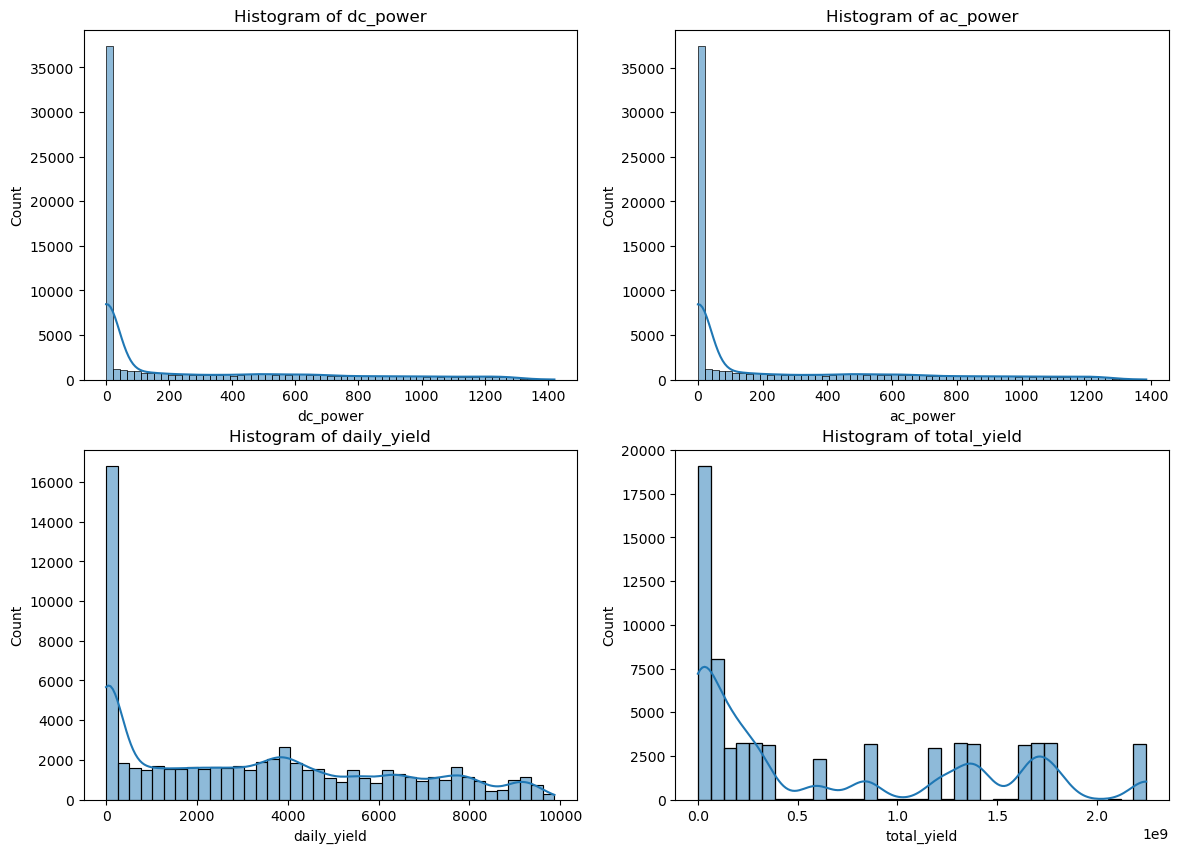

In [29]:
#creating the histograms for this columns
columns_to_check = ['dc_power','ac_power','daily_yield','total_yield']

num_col = 2
num_rows = 2

#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, columns_to_check):
    sns.histplot(p1_gen_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    plt.grid(False)

plt.show()

<h3>Observations </h3>

We can see that the histograms for AC_power and DC_power have numerous values of 0, this is due to the fact that during nighttime hours the inverters are unable to produce power. In the following analyses we are going to investigate whether these values are always correct or sometimes they may be due to some kind of malfunctioning. In indeed, some of these 0.0 output values could mean that the inverters/sensors are malfunctioning

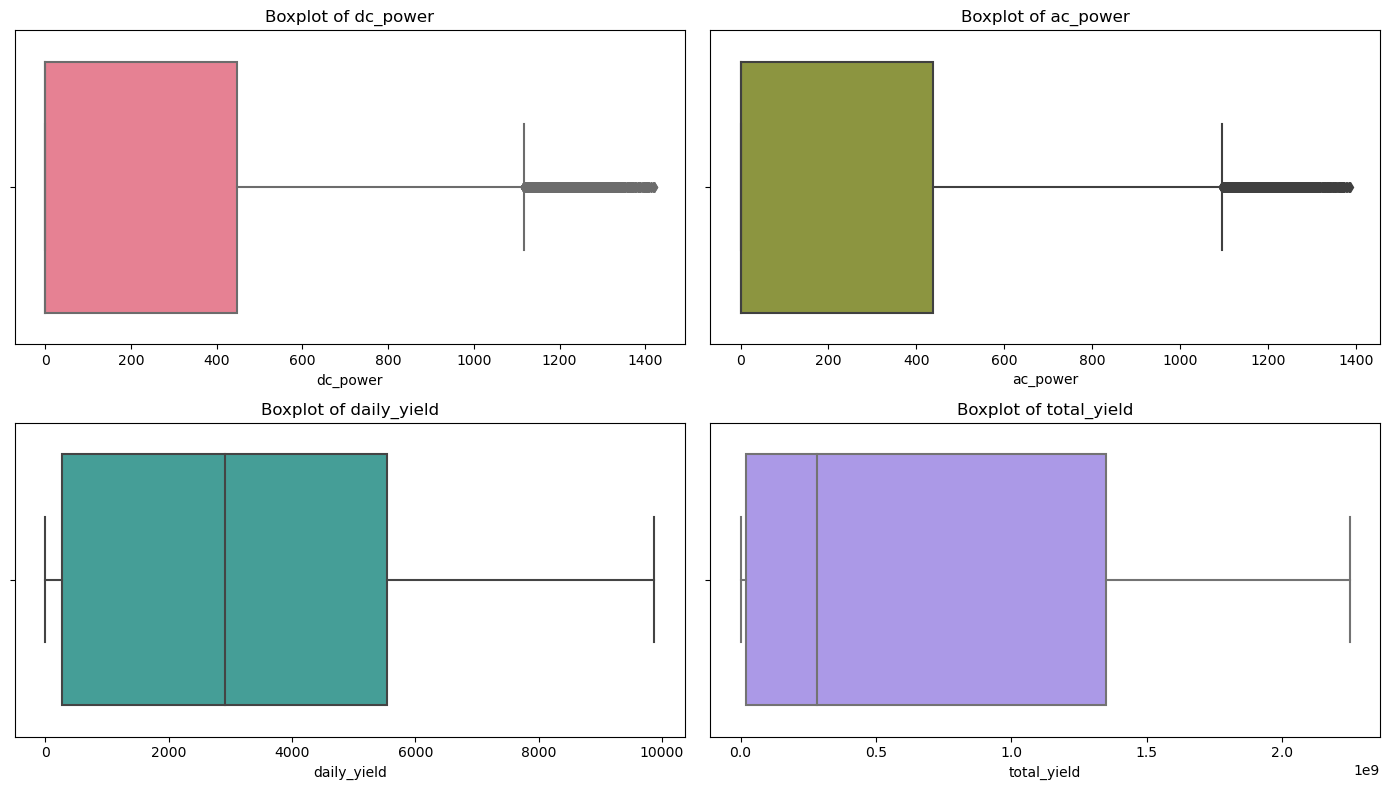

In [30]:
#box plots of the Plant 1 Generation Data
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,4 * 2))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check))

for ax, col, color in zip(axes, columns_to_check, colors):
    sns.boxplot(x=p1_gen_df[col], ax = ax, color= color)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

looking at the plots, it appears that no visible outliers are present

<h2>Data Visualization </h2>

In this section we will make several plots that will help us to better understand the data, we will try to extract information from them that will be useful in achieving the goals of the project and the implementation of the predictive models

<h3>DC_power & AC_power</h3>

In [31]:
def daily_dc_ac_distribution():
    copy_df = p1_gen_df.copy()
    copy_df['date_time'] = copy_df['date_time'].dt.strftime('%H:%M')
    mean_dc = copy_df.groupby('date_time')['dc_power'].mean().reset_index()
    mean_ac = copy_df.groupby('date_time')['ac_power'].mean().reset_index()
    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=copy_df, x='date_time', y='dc_power', alpha=0.6, color='forestgreen', label='DC Power')
    sns.scatterplot(data=copy_df, x='date_time', y='ac_power', alpha=0.6, color='orange', label='AC Power')
    plt.plot(mean_dc['date_time'], mean_dc['dc_power'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean DC Power')
    plt.plot(mean_ac['date_time'], mean_ac['ac_power'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean AC Power')
    plt.title('Daily DC and AC Power Distribution')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.grid(False)
    plt.show()

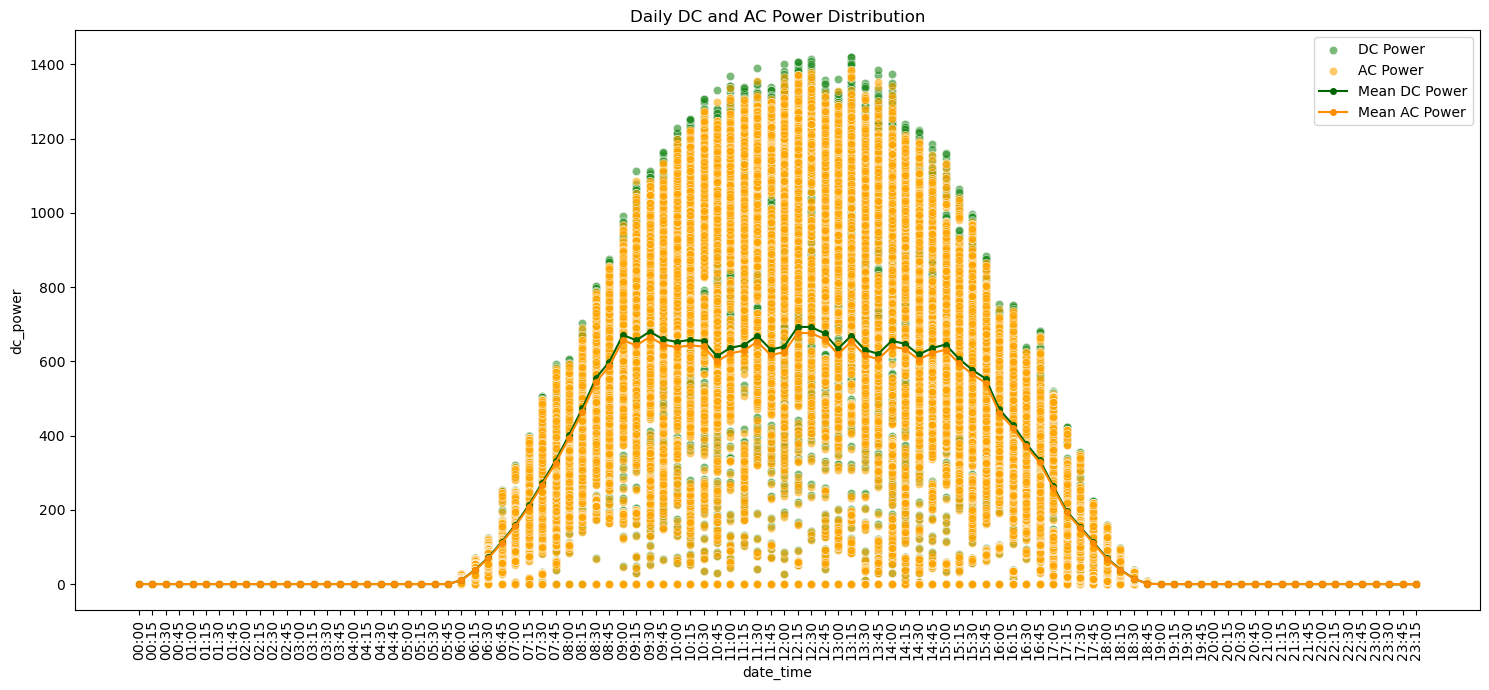

In [32]:
daily_dc_ac_distribution()

This graph allows us to visualize the distribution of dc_power and ac_power produced daily. Recall that the dc_power represents the amount of solar energy that has been collected by the panel and converted to direct current, while the ac_power represents the direct current that the inverter has converted to alternate_current to allow it to be used and transported. As can be seen from the daily distribution, the current is produced from 5:45 am until approximately 6:45 pm, which is during the times when the panels are subject to sunlight.

<h3>Daily Yield </h3>

The daily yield represents the daily performance of the inverter specifically the amount of alternating energy it was able to convert, in the following plots we will try to understand its performance over the period under consideration

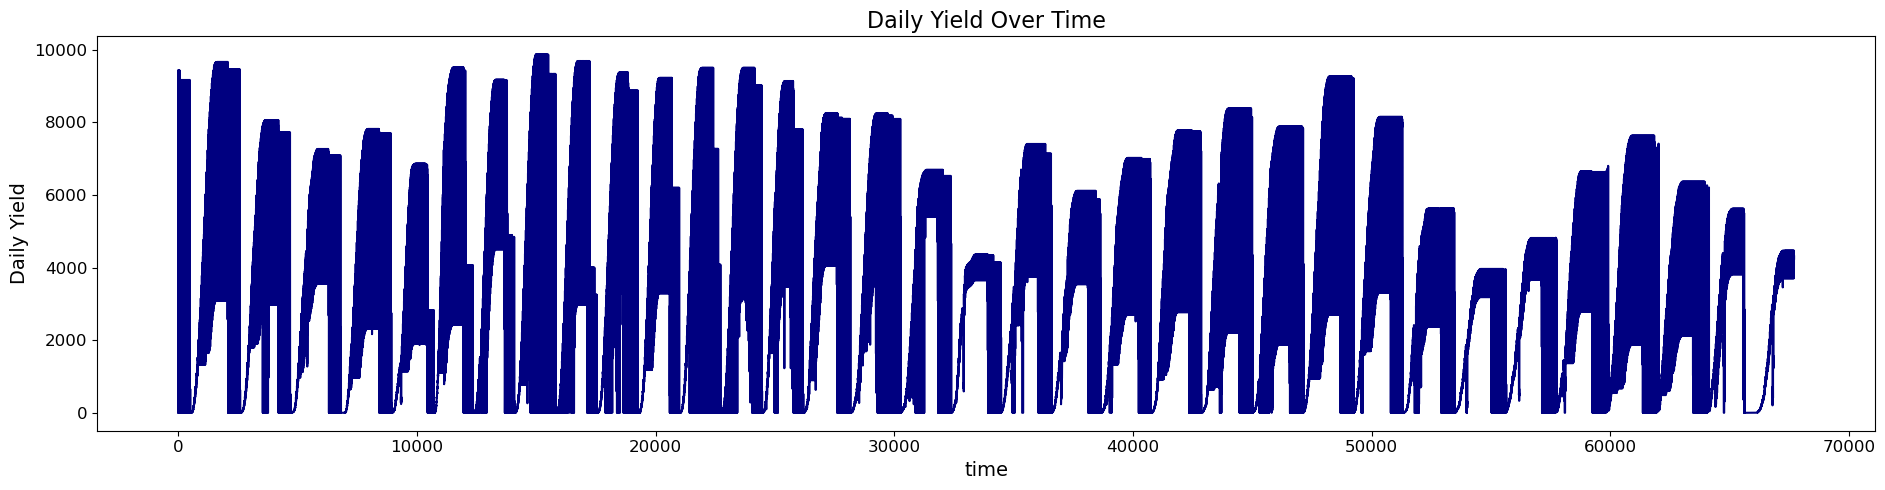

In [33]:
#plotting the daily yield over time
plt.figure(figsize=(19, 5))
p1_gen_df['daily_yield'].plot(color='navy')
plt.title('Daily Yield Over Time', fontsize=16)
plt.xlabel('time', fontsize=14)  
plt.ylabel('Daily Yield', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

The daily yield represents the amount of ac_power produced, it represents a cumulative sum for each day, this explains the shape of the graph made by high and low peaks. In fact, as we could see from the previous graph in which we analyzed the relationship between dc_power and ac_power, energy is produced only at certain times of day (those when the sun is present). So we can see the bases of the peaks remaining at zero for some time

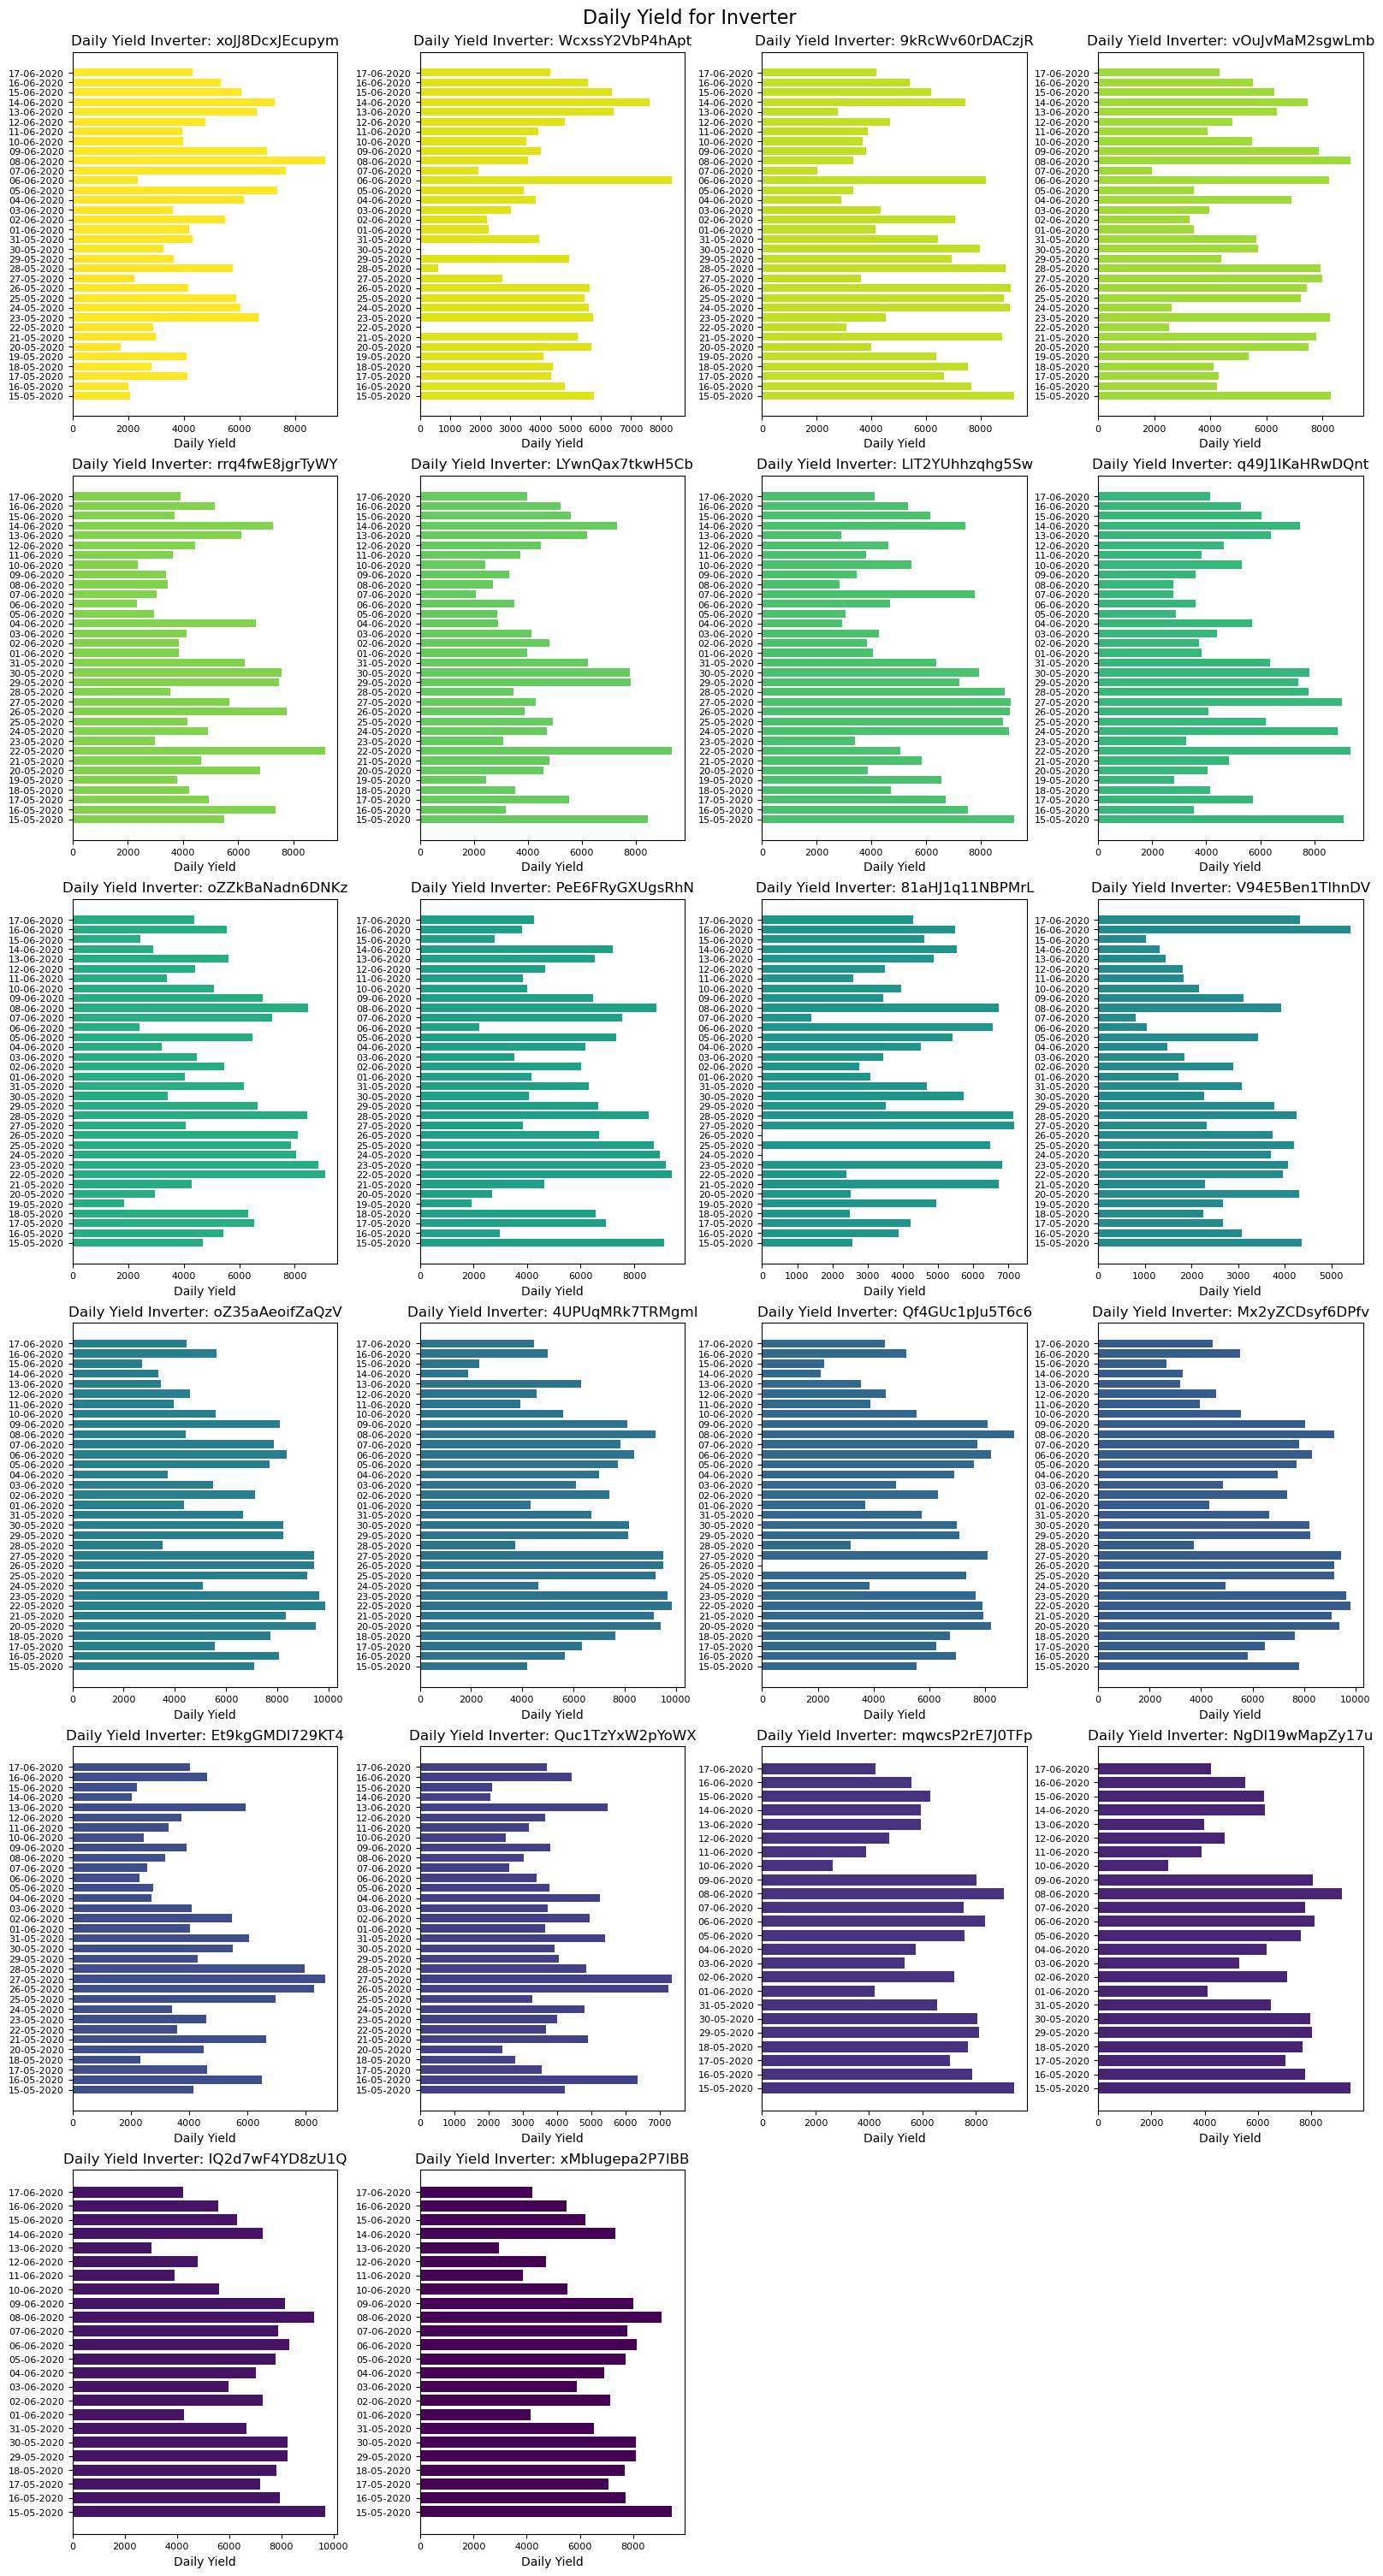

In [34]:
#plotting the daily yiled of each inverter for all the days
num_inverters = len(p1_invertes)
num_cols = 4
num_rows = (num_inverters + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows), constrained_layout=True)
axs = axs.flatten()
colors = plt.cm.viridis_r(np.linspace(0, 1, num_inverters))
for idx, i in enumerate(p1_invertes):
    daily_yield = p1_gen_df[p1_gen_df['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    invert_dy = daily_yield[daily_yield['source_key'] == i]
    axs[idx].barh(invert_dy['date_time'].dt.strftime('%d-%m-%Y'), invert_dy['daily_yield'], color=colors[idx])
    axs[idx].set_title(f'Daily Yield Inverter: {i}', fontsize=12)
    axs[idx].set_xlabel('Daily Yield', fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=8)
for ax in axs[num_inverters:]:
    fig.delaxes(ax)
plt.suptitle('Daily Yield for Inverter', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.grid(False)
plt.show()


With this plots which represent the daily yield per day for each inverter, so there are some days for which the inverters do not produce energy. In particular here we can notice that the performance of the inverters are differents, so some of them have more days without production than others. In order to undestand the reason for that and eventualy sub ottimal performance, we can take a deep look about the daily yield distribution.

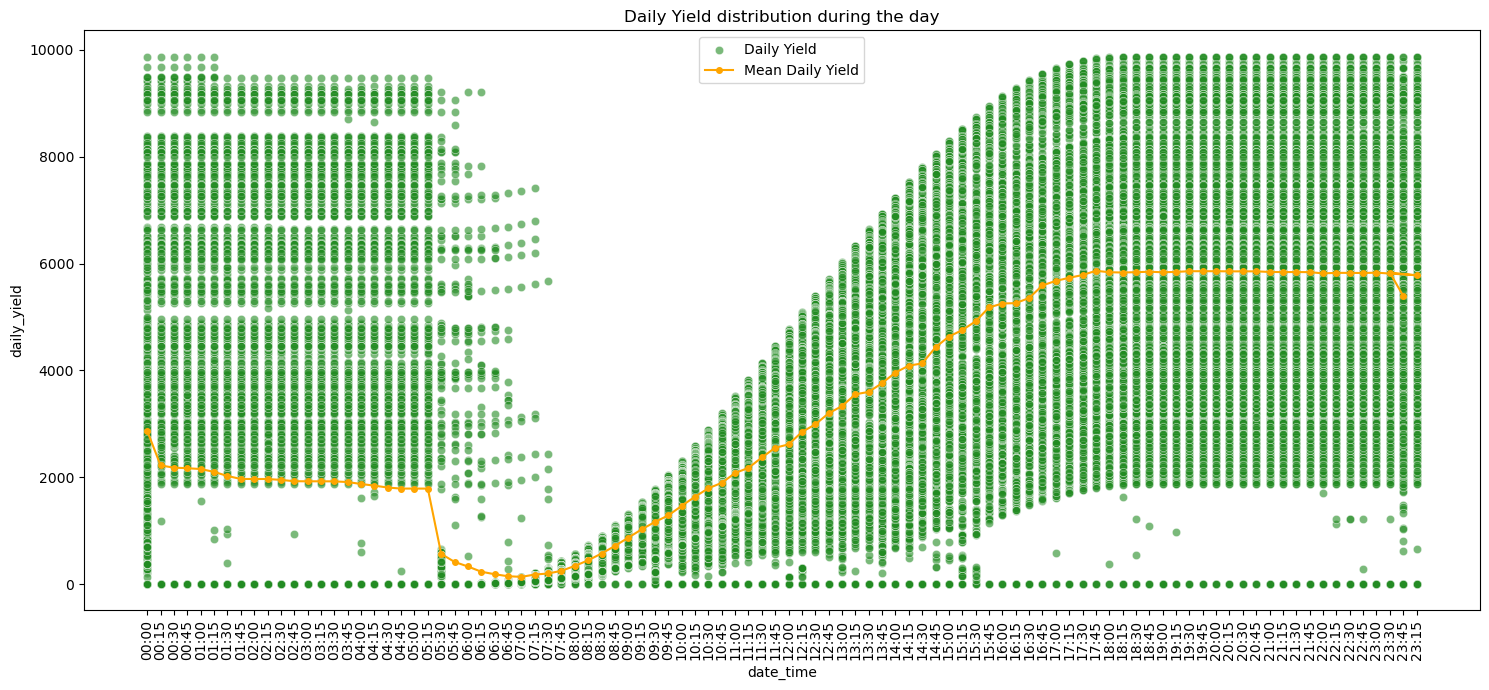

In [35]:
#plotting the daily yield over the hours of the day for each inverter in each day
plot_copy = p1_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

Representing the distribution of daily yield during the day, we can see an interesting thing. Namely, that for some inverters there is a daily yield measurement at 0:00 am which is an anomaly since the energy as we could see earlier starts to be produced only from 5:30 am. Let us therefore correct this anomaly in the measurements by making 0.00 such daily yield values. We can easily notice another problem. The dots of the daily yield which lay on the value 0 only after the 18.30 are anomalies. Thanks to that error some days appears without production but actually they produced until 18.30 but after that they stopped, this doesn't mean that the daily yield for that day should be 0.00. We will adjust also this data of the daily yield with the last availble value for that specific day. (this doesn't affect the distribution of the energy produced of that day)

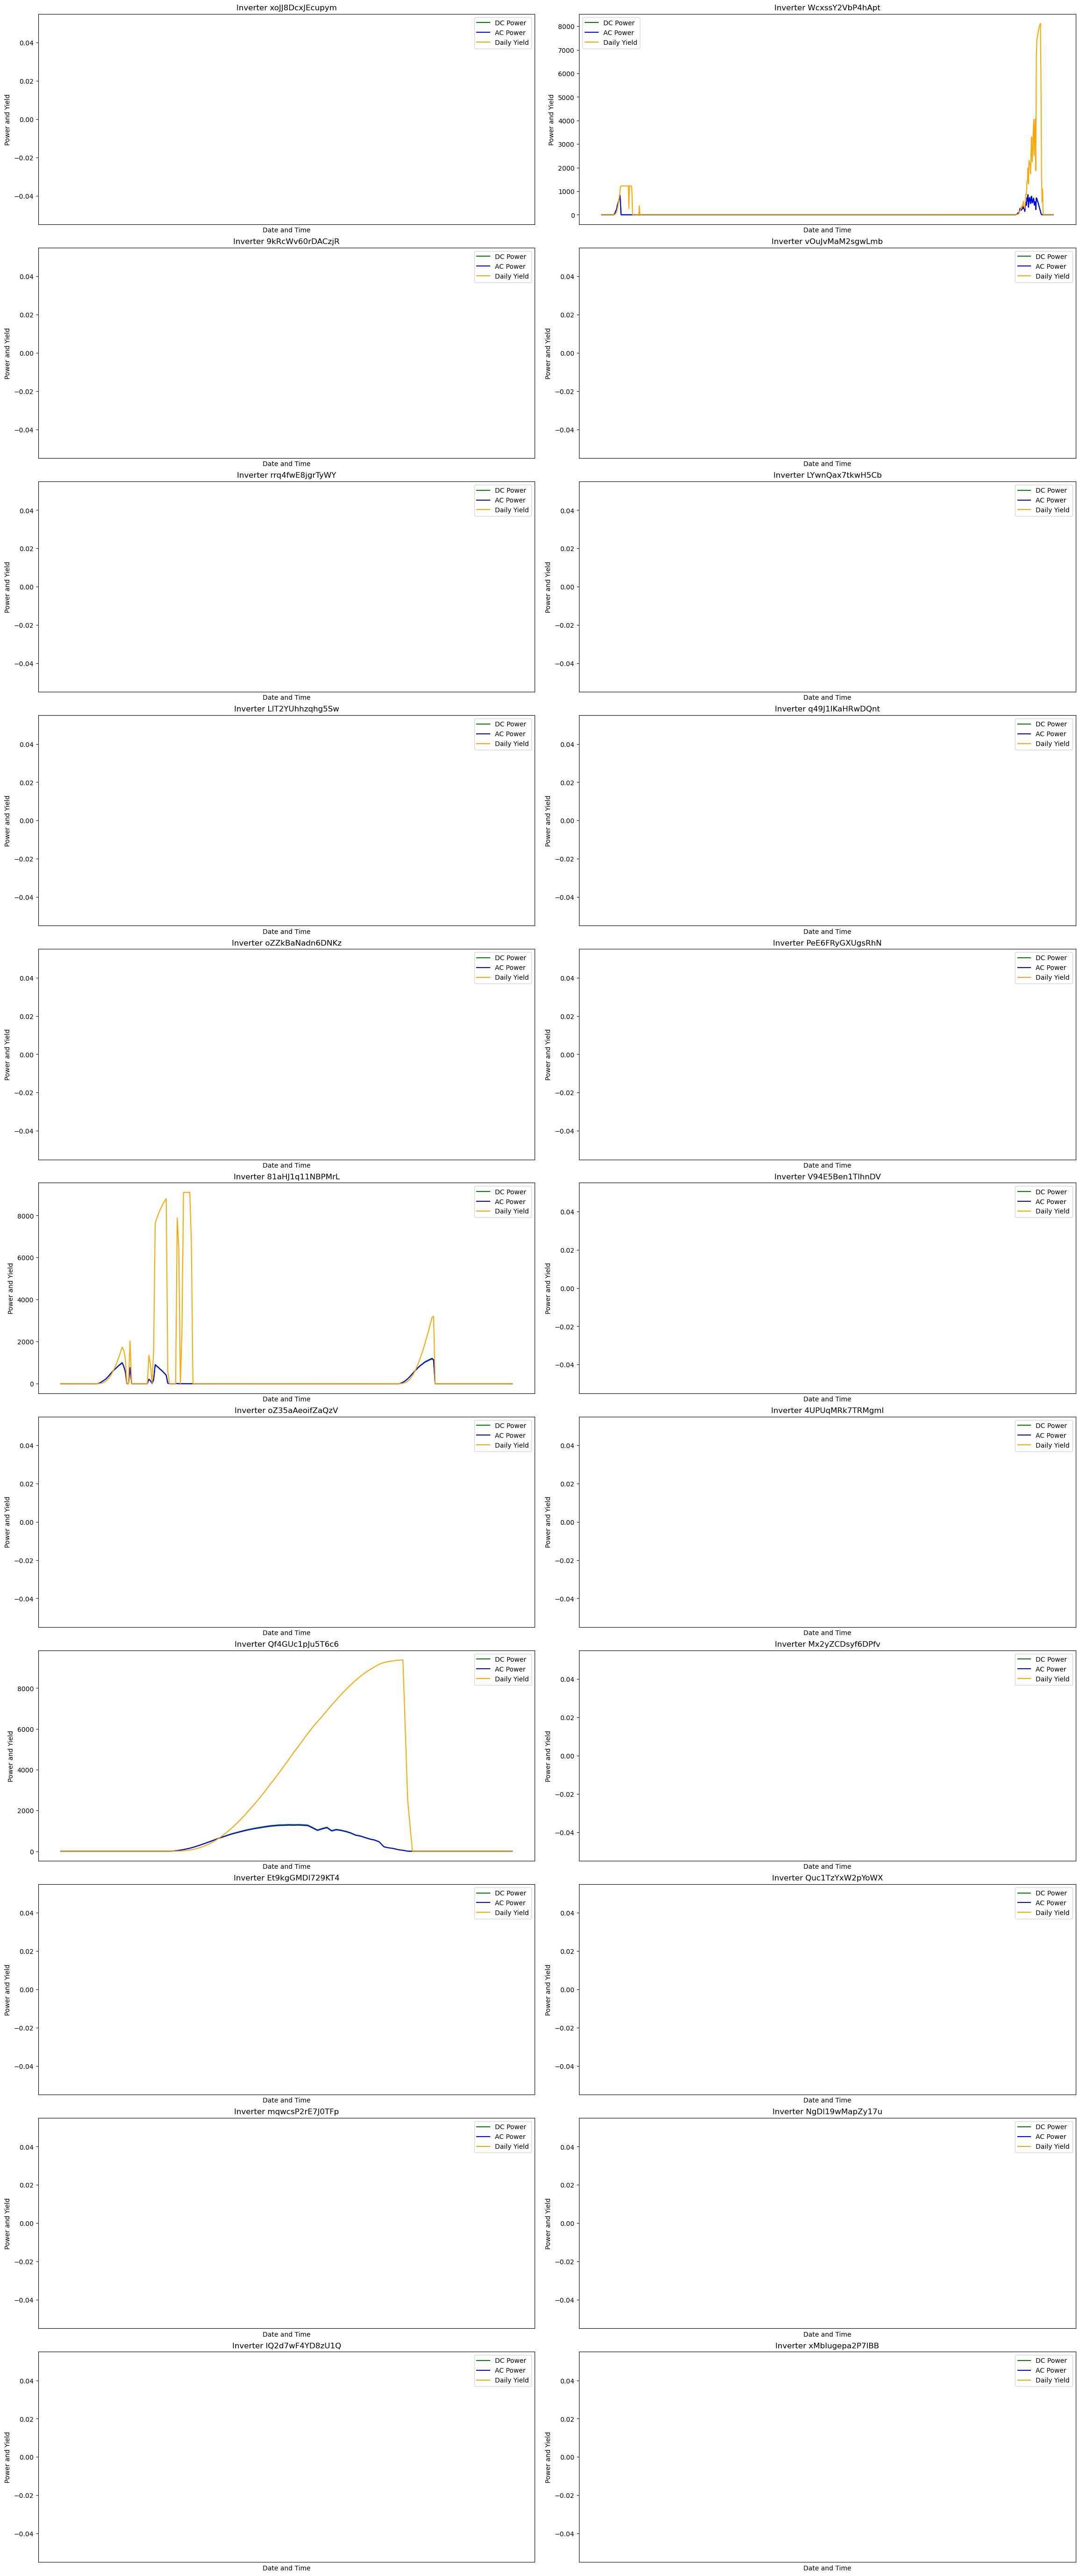

In [36]:
#plotting the daily yield, ac_power, dc_power for each inverter over the days for which the production of energy should
#be 0

df_test = p1_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

This graph represents the daily yield, ac and dc power for each inverter on days that appear with a daily yield of 0. It is easy to see that some days have the anomalies identified above. In indeed if the measurements were correct these graphs should be flat and show no peaks. Instead as we can see these peaks are due to the fact that at some point in the day a measurement error brings the daily yield to zero representing that day as non-productive. We will then go on to correct these daily yield values with the latest measurement available for that day

<h3>Inverters</h3>

In [37]:
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [38]:
Total_ac_P1 = p1_gen_df.groupby(['source_key'])['ac_power'].sum().reset_index()
#Total_ac_P2 = p2_gen_df.groupby(['source_key'])['ac_power'].sum().reset_index()

In [39]:
Total_dc_P1 = p1_gen_df.groupby(['source_key'])['dc_power'].sum().reset_index()
#Total_dc_P2 = p2_gen_df.groupby(['source_key'])['dc_power'].sum().reset_index()

In [40]:
Total_dcac_P1 = pd.merge(Total_dc_P1,Total_ac_P1, on=['source_key'], how='inner')
#Total_dcac_P2 = pd.merge(Total_dc_P2,Total_ac_P2, on=['source_key'], how='inner')

In [41]:
Total_dcac_P1['AC/DC'] = (Total_ac_P1['ac_power'] / Total_dc_P1['dc_power'])*100
#Total_dcac_P2['AC/DC'] = (Total_ac_P2['ac_power'] / Total_dc_P2['dc_power'])*100

In [43]:
print(f"Efficency of inverters in Plant1:\n {Total_dcac_P1}")

Efficency of inverters in Plant1:
          source_key       dc_power       ac_power      AC/DC
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197 

In [523]:
#print(f"Efficency of inverters in Plant2:\n {Total_dcac_P2}")
##Et9kgGMDl729KT4, Quc1TzYxW2pYoWX, LYwnQax7tkwH5Cb receive little incoming DC despite having a high number of observations.
#While mqwcsP2rE7J0TFp, NgDl19wMapZy17u, IQ2d7wF4YD8zU1Q, xMbIugepa2P7lBB the value is justified by having almost 800 fewer observations

Efficency of inverters in Plant2:
          source_key       dc_power       ac_power      AC/DC
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197 

In [44]:
observations_count1 = p1_gen_df['source_key'].value_counts().reset_index()
observations_count1.columns = ['source_key', 'Count']

# Merge the observation count with the Total_dcac_P1 dataframe
Total_dcac_P1 = pd.merge(Total_dcac_P1, observations_count1, on='source_key', how='inner')
# Normalize the DC_POWER by the number of observations
Total_dcac_P1['dc_power_normalized'] = Total_dcac_P1['dc_power'] / Total_dcac_P1['Count']

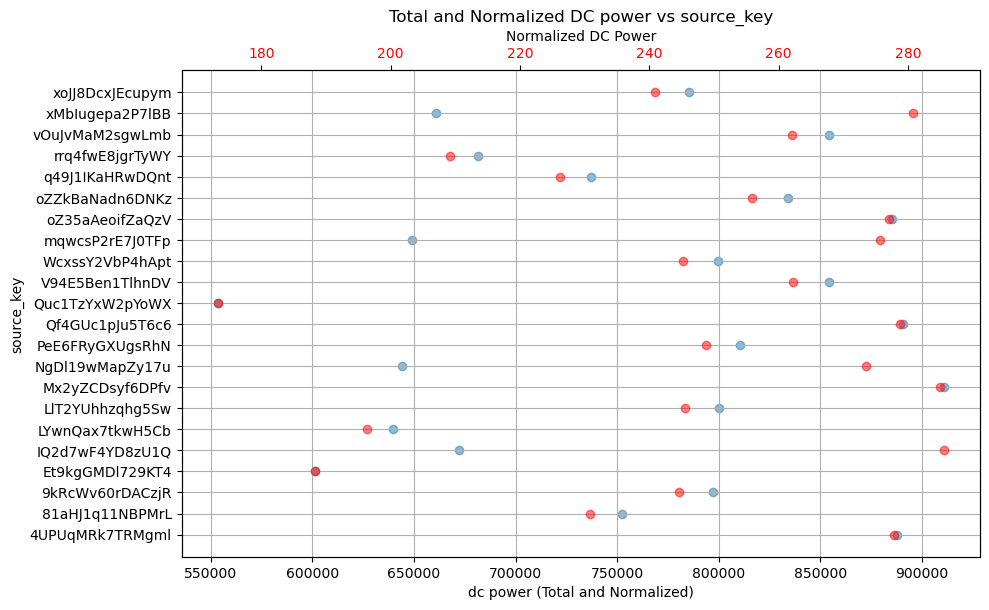

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for total DC power
ax1.set_xlabel('dc power (Total and Normalized)')
ax1.set_ylabel('source_key')
ax1.scatter(Total_dcac_P1['dc_power'], Total_dcac_P1['source_key'], alpha=0.5)
ax1.tick_params(axis='y')
ax1.grid(True)

# Create a second axis sharing the same y-axis
ax2 = ax1.twiny()

# Plot for normalized DC power
ax2.set_xlabel('Normalized DC Power')
ax2.scatter(Total_dcac_P1['dc_power_normalized'], Total_dcac_P1['source_key'], alpha=0.5, color='red')
ax2.tick_params(axis='x', labelcolor='red')

fig.tight_layout()
plt.title('Total and Normalized DC power vs source_key')
plt.show()



In [46]:
Total_dcac_P1

source_key       dc_power       ac_power      AC/DC  Count  \
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752   3195   
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136   3259   
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546   3259   
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887   3195   
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261   2355   
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490   3259   
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537   3259   
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743   3195   
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871   2355   
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051   3259   
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204   3195   
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367   3195   
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110   3259   
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486   3259   
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197  97.792580   2355   
15  oZ35aAeoifZaQzV  885151.874261  865435.791964  97.772576   3195   
16  oZZkBaNadn6DNKz  834046.999676  815637.897502  97.792798   3259   
17  q49J1IKaHRwDQnt  737061.896822  721060.844115  97.829076   3259   
18  rrq4fwE8jgrTyWY  681647.365682  667002.354956  97.851527   3259   
19  vOuJvMaM2sgwLmb  854172.894243  835012.155241  97.756808   3259   
20  xMbIugepa2P7lBB  661077.859235  646458.728993  97.788592   2355   
21  xoJJ8DcxJEcupym  785180.932443  767932.701010  97.803279   3259   

    dc_power_normalized  
0            277.760524  
1            230.796317  
2            244.653027  
3            188.230376  
4            285.525112  
5            196.286078  
6            245.493296  
7            285.013230  
8            273.522084  
9            248.689407  
10           278.746893  
11           173.254729  
12           262.158843  
13           245.274699  
14           275.701451  
15           277.042840  
16           255.921141  
17           226.161981  
18           209.158443  
19           262.096623  
20           280.712467  
21           240.926951

In [47]:
Total_dcac_P1['dc_power_normalized'].sort_values()

11    173.254729
3     188.230376
5     196.286078
18    209.158443
17    226.161981
1     230.796317
21    240.926951
2     244.653027
13    245.274699
6     245.493296
9     248.689407
16    255.921141
19    262.096623
12    262.158843
8     273.522084
14    275.701451
15    277.042840
0     277.760524
10    278.746893
20    280.712467
7     285.013230
4     285.525112
Name: dc_power_normalized, dtype: float64

In [528]:
observations_count2 = p2_gen_df['source_key'].value_counts().reset_index()
observations_count2.columns = ['source_key', 'Count']

# Merge the observation count with the Total_dcac_P1 dataframe
Total_dcac_P2 = pd.merge(Total_dcac_P2, observations_count2, on='source_key', how='inner')
# Normalize the DC_POWER by the number of observations
Total_dcac_P2['dc_power_normalized'] = Total_dcac_P2['dc_power'] / Total_dcac_P2['Count']


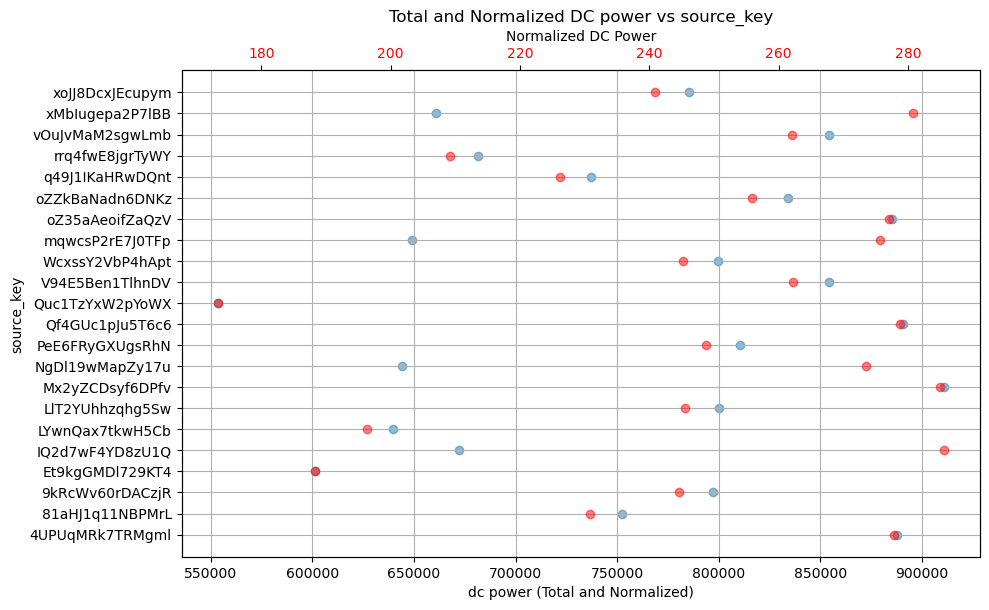

In [529]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for total DC power
ax1.set_xlabel('dc power (Total and Normalized)')
ax1.set_ylabel('source_key')
ax1.scatter(Total_dcac_P2['dc_power'], Total_dcac_P2['source_key'], alpha=0.5)
ax1.tick_params(axis='y')
ax1.grid(True)

# Create a second axis sharing the same y-axis
ax2 = ax1.twiny()

# Plot for normalized DC power
ax2.set_xlabel('Normalized DC Power')
ax2.scatter(Total_dcac_P2['dc_power_normalized'], Total_dcac_P2['source_key'], alpha=0.5, color='red')
ax2.tick_params(axis='x', labelcolor='red')

fig.tight_layout()
plt.title('Total and Normalized DC power vs source_key')
plt.show()

In [530]:
Total_dcac_P2

source_key       dc_power       ac_power      AC/DC  Count  \
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752   3195   
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136   3259   
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546   3259   
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887   3195   
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261   2355   
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490   3259   
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537   3259   
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743   3195   
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871   2355   
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051   3259   
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204   3195   
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367   3195   
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110   3259   
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486   3259   
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197  97.792580   2355   
15  oZ35aAeoifZaQzV  885151.874261  865435.791964  97.772576   3195   
16  oZZkBaNadn6DNKz  834046.999676  815637.897502  97.792798   3259   
17  q49J1IKaHRwDQnt  737061.896822  721060.844115  97.829076   3259   
18  rrq4fwE8jgrTyWY  681647.365682  667002.354956  97.851527   3259   
19  vOuJvMaM2sgwLmb  854172.894243  835012.155241  97.756808   3259   
20  xMbIugepa2P7lBB  661077.859235  646458.728993  97.788592   2355   
21  xoJJ8DcxJEcupym  785180.932443  767932.701010  97.803279   3259   

    dc_power_normalized  
0            277.760524  
1            230.796317  
2            244.653027  
3            188.230376  
4            285.525112  
5            196.286078  
6            245.493296  
7            285.013230  
8            273.522084  
9            248.689407  
10           278.746893  
11           173.254729  
12           262.158843  
13           245.274699  
14           275.701451  
15           277.042840  
16           255.921141  
17           226.161981  
18           209.158443  
19           262.096623  
20           280.712467  
21           240.926951

In [531]:
Total_dcac_P2['dc_power_normalized'].sort_values()

11    173.254729
3     188.230376
5     196.286078
18    209.158443
17    226.161981
1     230.796317
21    240.926951
2     244.653027
13    245.274699
6     245.493296
9     248.689407
16    255.921141
19    262.096623
12    262.158843
8     273.522084
14    275.701451
15    277.042840
0     277.760524
10    278.746893
20    280.712467
7     285.013230
4     285.525112
Name: dc_power_normalized, dtype: float64

<h3> Pannel Performance </h3>

<h3>Total Yield</h3>

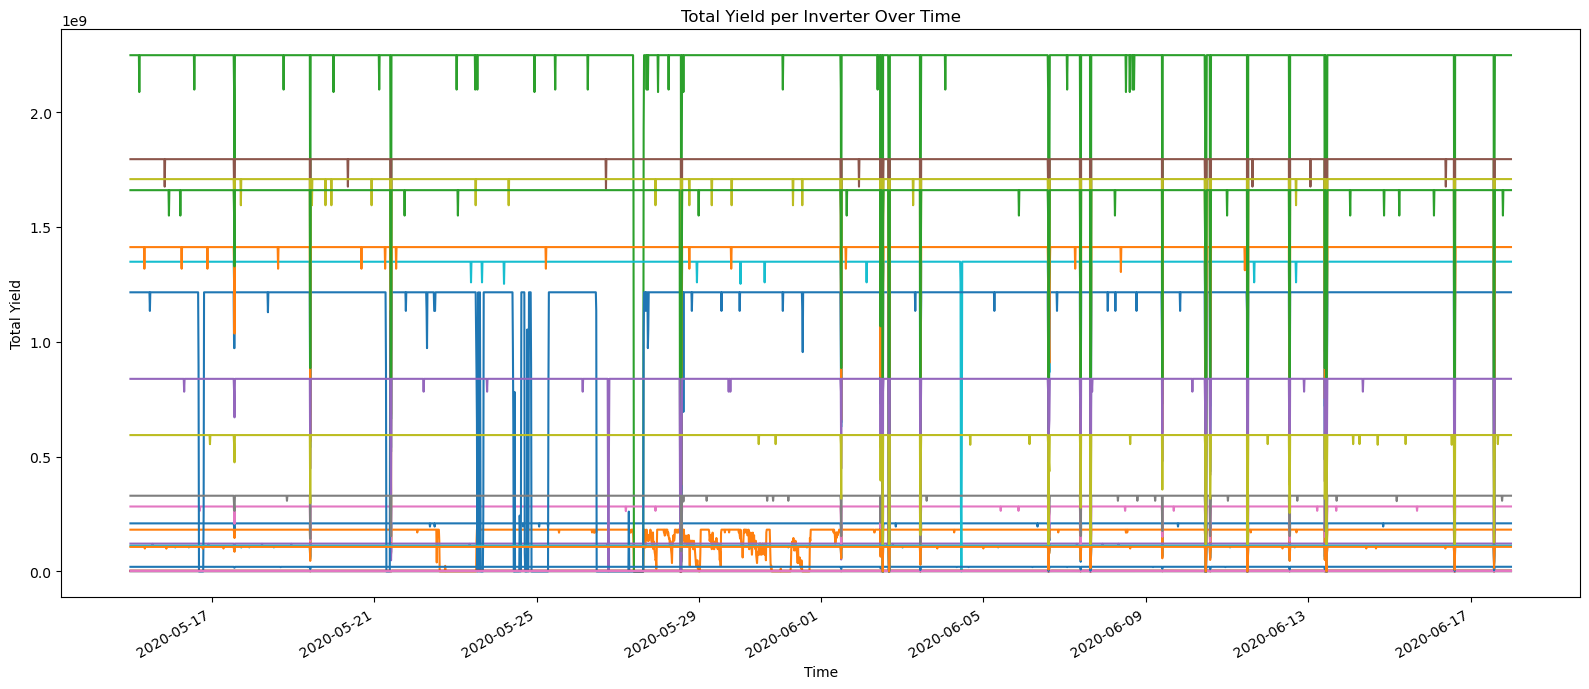

In [48]:
plt.figure(figsize=(16,7))
for i in p1_invertes:
    df = p1_gen_df[p1_gen_df['source_key'] == i]
    df.set_index('date_time')['total_yield'].plot()
plt.xlabel('Time')
plt.ylabel('Total Yield')
plt.title('Total Yield per Inverter Over Time')
plt.tight_layout()
plt.grid(False)
plt.show()

<h2> EDA Weather Plant 1</h2>

<h3>First Look </h3>

In [49]:
#first 5 rows of the weather data for plant 1
p1_wea_df.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

<h3>Shape and Size</h3>

In [50]:
# shape and size of the weather dataset
p1_wea_shape = p1_wea_df.shape
p1_wea_size = p1_wea_df.size
print(f'The Weather Data for the plant 1 is composed by: {p1_wea_shape[0]} rows and {p1_wea_shape[1]} columns.\nFor a total of {p1_wea_size} values')

The Weather Data for the plant 1 is composed by: 3259 rows and 6 columns.
For a total of 19554 values


<h3>Dataframe Info</h3>

In [51]:
#information about the Weather Data for the plant 1
p1_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


<h3>Missing Data </h3>

In [52]:
#to be sure, we can still check for null values
p1_wea_df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [53]:
#statistics description of the generation data for the plant 1
p1_wea_df.describe().T

count          mean        std           min  \
PLANT_ID             3259.0  4.136001e+06   0.000000  4.136001e+06   
AMBIENT_TEMPERATURE  3259.0  2.806940e+01   4.061556  2.094238e+01   
MODULE_TEMPERATURE   3259.0  3.277241e+01  11.344034  2.026512e+01   
IRRADIATION          3259.0  2.327370e-01   0.312693  0.000000e+00   

                              25%           50%           75%           max  
PLANT_ID             4.136001e+06  4.136001e+06  4.136001e+06  4.136001e+06  
AMBIENT_TEMPERATURE  2.460213e+01  2.698126e+01  3.105676e+01  3.918164e+01  
MODULE_TEMPERATURE   2.371688e+01  2.753461e+01  4.048065e+01  6.663595e+01  
IRRADIATION          0.000000e+00  1.904047e-02  4.387172e-01  1.098766e+00

<h3>Column Names</h3>

In [54]:
#adjusting the name of the columns in order to make it easier to work with
p1_wea_df.columns = list(map(lambda x : x.lower(),p1_wea_df.columns))
p1_wea_df.columns

Index(['date_time', 'plant_id', 'source_key', 'ambient_temperature',
       'module_temperature', 'irradiation'],
      dtype='object')

In [55]:
#formatting the date_time column in format: datetime
p1_wea_df['date_time'] = pd.to_datetime(p1_wea_df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [56]:
#extract all the days that are observed in our dataset
def days_analyzed():
    copy1 = p1_wea_df.copy()
    copy1['day_month_year'] = copy1['date_time'].dt.strftime('%d-%m-%Y')
    date_list = []
    for i in copy1['day_month_year']:
        if i not in date_list:
            date_list.append(i)
    return date_list
days_analyzed()

['15-05-2020',
 '16-05-2020',
 '17-05-2020',
 '18-05-2020',
 '19-05-2020',
 '20-05-2020',
 '21-05-2020',
 '22-05-2020',
 '23-05-2020',
 '24-05-2020',
 '25-05-2020',
 '26-05-2020',
 '27-05-2020',
 '28-05-2020',
 '29-05-2020',
 '30-05-2020',
 '31-05-2020',
 '01-06-2020',
 '02-06-2020',
 '03-06-2020',
 '04-06-2020',
 '05-06-2020',
 '06-06-2020',
 '07-06-2020',
 '08-06-2020',
 '09-06-2020',
 '10-06-2020',
 '11-06-2020',
 '12-06-2020',
 '13-06-2020',
 '14-06-2020',
 '15-06-2020',
 '16-06-2020',
 '17-06-2020']

they are the same as the power generation dataset

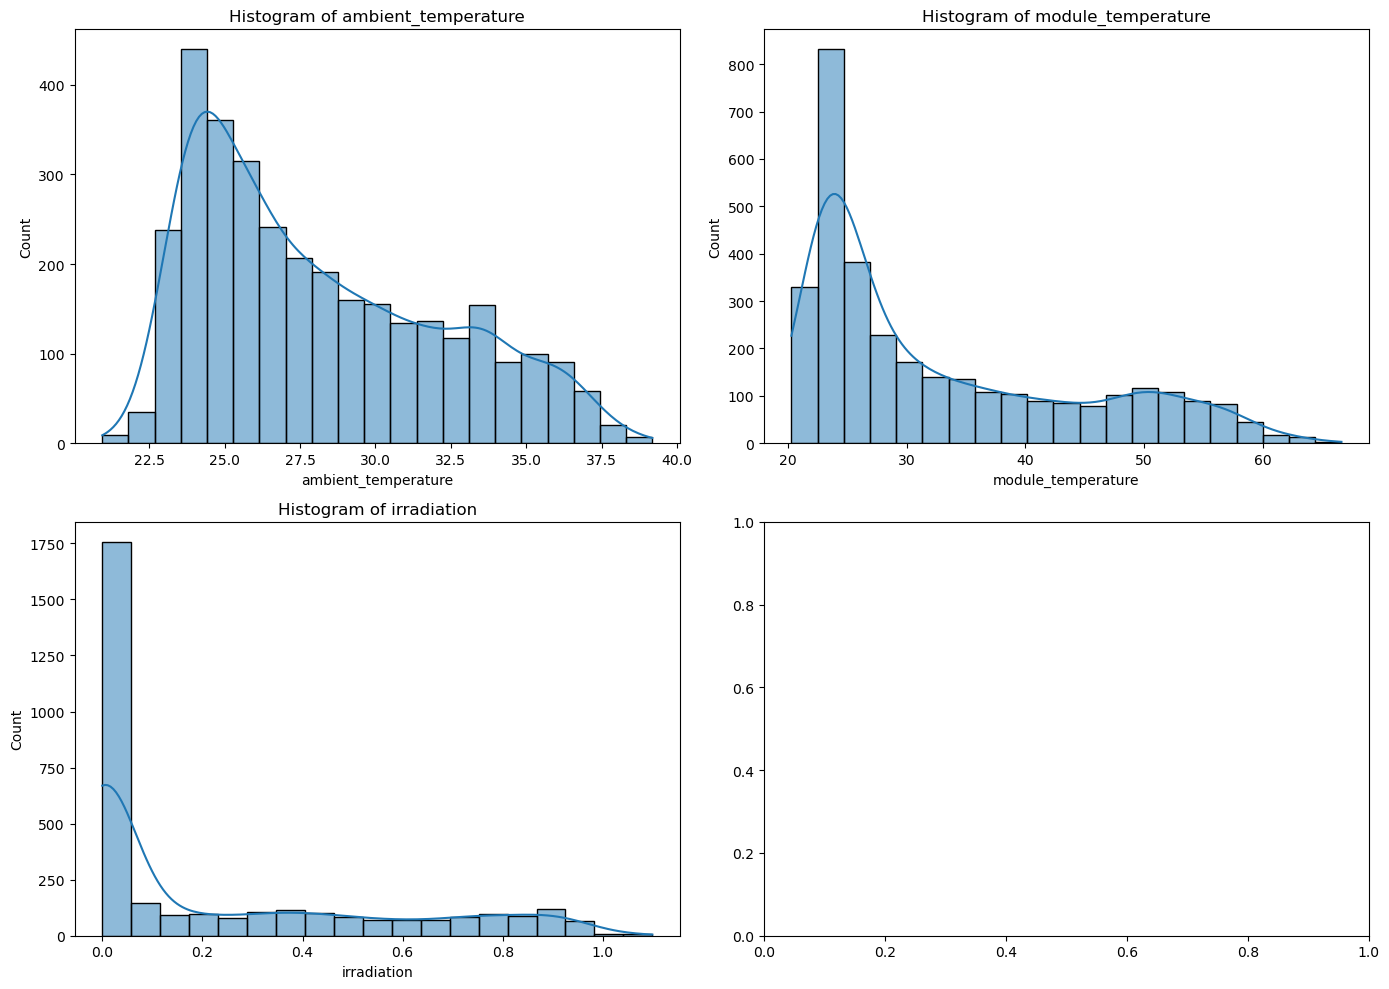

In [57]:
#creating the histograms for this columns
columns_to_check2 = ['ambient_temperature','module_temperature', 'irradiation']
num_col = len(columns_to_check2)
num_rows = (num_col // 2) + (num_col % 2)
#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))
axes = axes.flatten()
for ax, col in zip(axes, columns_to_check2):
    sns.histplot(p1_wea_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

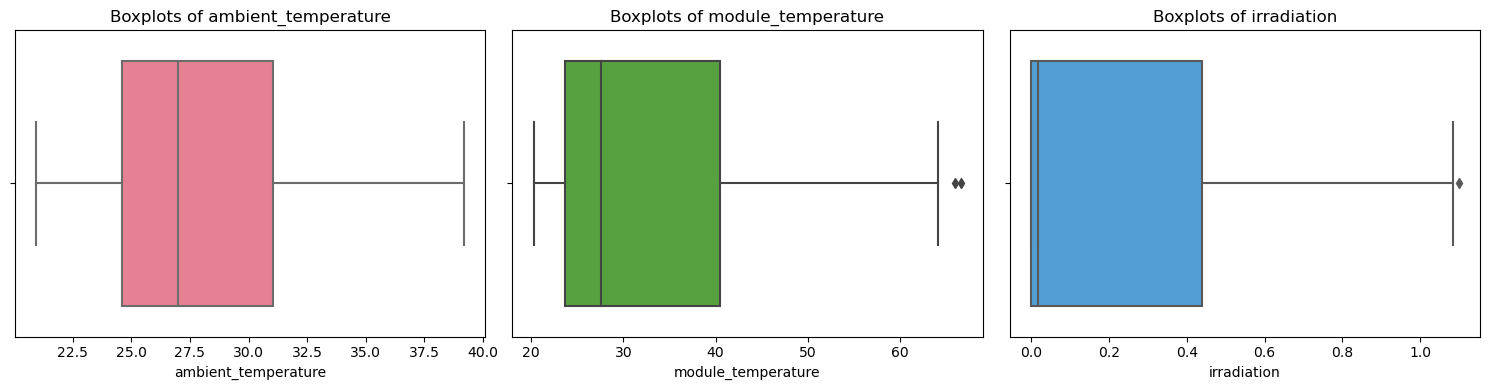

In [58]:
#box plots of the Weather Data plant 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check2))

for ax, col, color in zip(axes, columns_to_check2, colors):
    sns.boxplot(x=p1_wea_df[col], ax = ax, color= color)
    ax.set_title(f'Boxplots of {col}')
plt.tight_layout()
plt.show()

<h3>Outliers Weather Dataset</h3>

In [59]:
#function to check for outliers
def identify_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    return outliers

In [60]:
identify_outliers(p1_wea_df,'irradiation')

date_time  plant_id       source_key  ambient_temperature  \
1965 2020-06-04 12:30:00   4136001  iq8k7ZNt4Mwm3w0            32.124079   

      module_temperature  irradiation  
1965           54.410215     1.098766

In [61]:
#removing the outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

p1_wea_df = remove_outliers(p1_wea_df, 'irradiation')

<h3>Ambient Temperature and Module Temperature Over the day </h3>

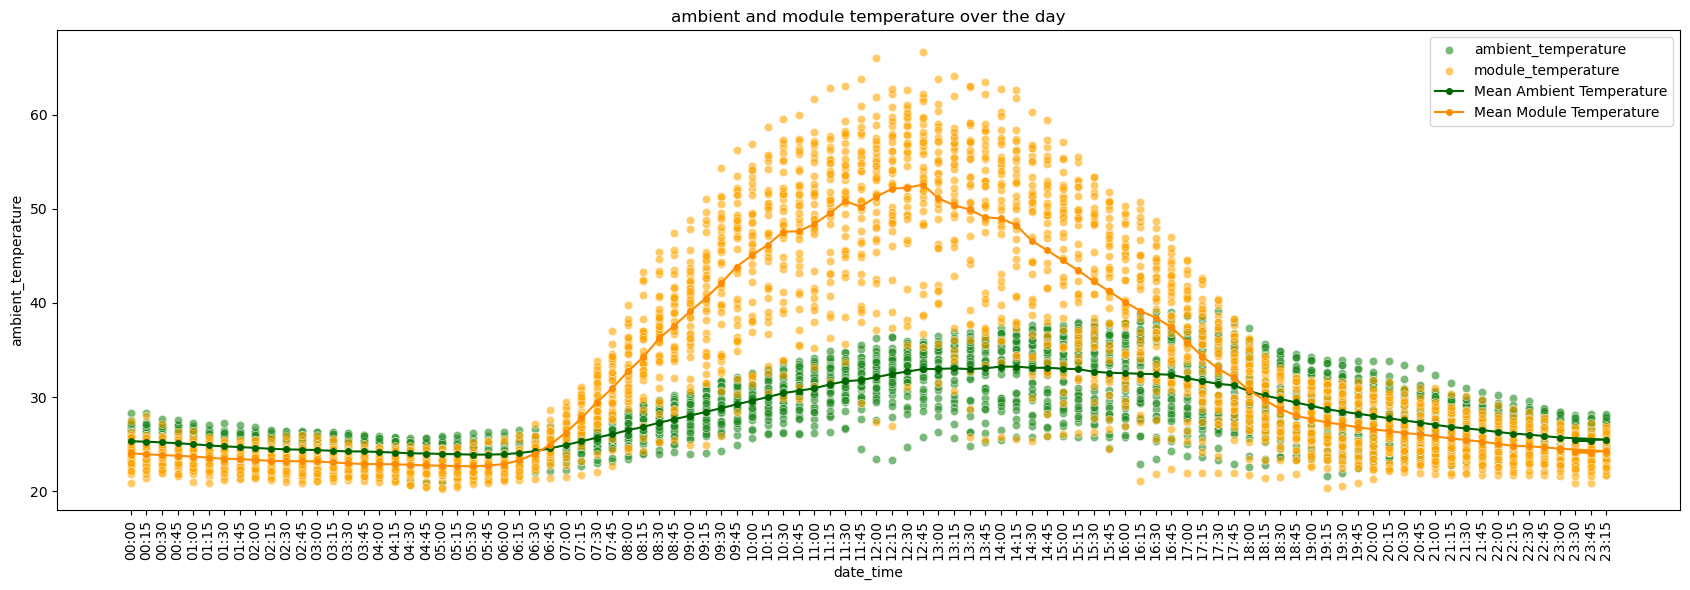

In [62]:
#plotting the temperature for over the hours of the day and the mean temperature
copy_weather = p1_wea_df.copy()
copy_weather['date_time'] = copy_weather['date_time'].dt.strftime('%H:%M')
mean_temp = copy_weather.groupby('date_time')['ambient_temperature'].mean().reset_index()
mean_mod = copy_weather.groupby('date_time')['module_temperature'].mean().reset_index()
plt.figure(figsize=(17,6))
sns.scatterplot(data=copy_weather, x='date_time', y='ambient_temperature', alpha=0.6, color='forestgreen', label='ambient_temperature')
sns.scatterplot(data=copy_weather, x='date_time', y='module_temperature', alpha=0.6, color='orange', label='module_temperature')
plt.plot(mean_temp['date_time'], mean_temp['ambient_temperature'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Ambient Temperature')
plt.plot(mean_mod['date_time'], mean_mod['module_temperature'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Module Temperature')
plt.title('ambient and module temperature over the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<h3>Irradiation</h3>

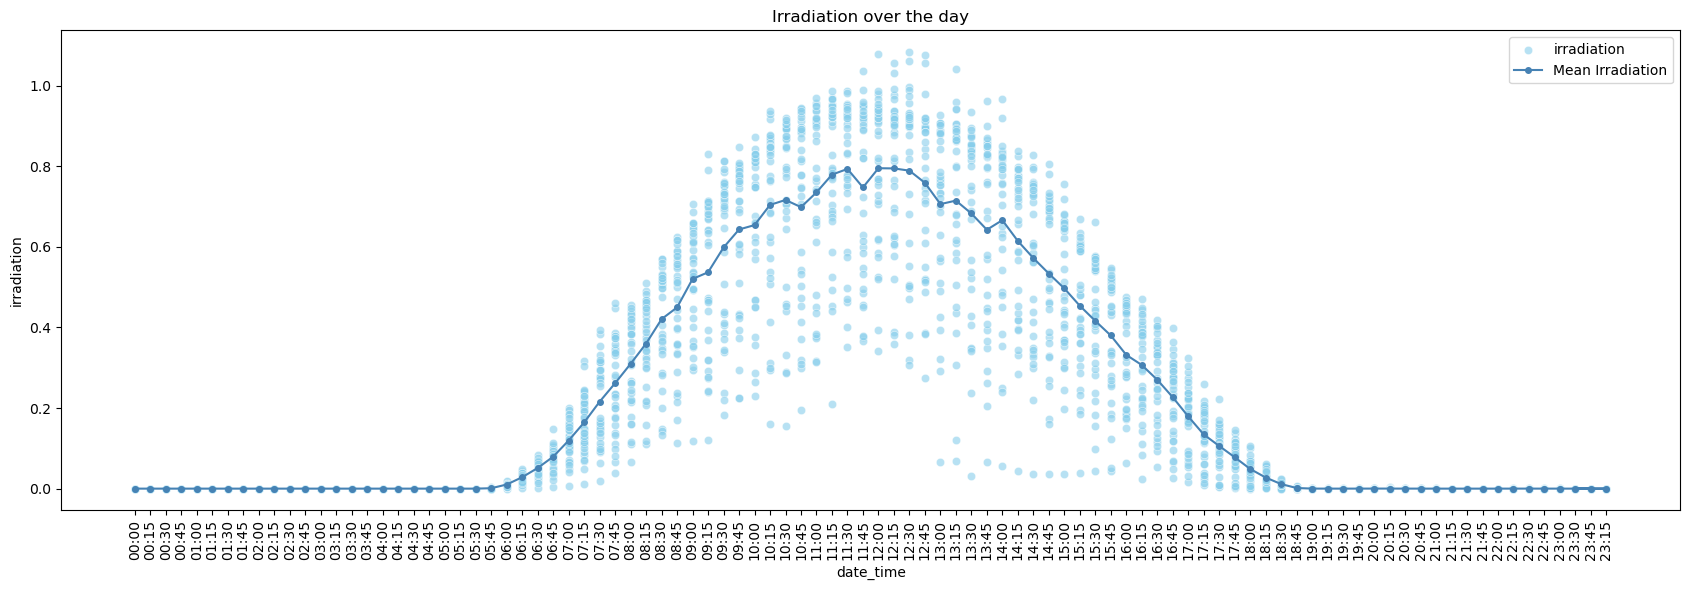

In [63]:
#plotting the irradiation during the day
mean_irr = copy_weather.groupby('date_time')['irradiation'].mean().reset_index()
plt.figure(figsize=(17,6))
sns.scatterplot(data=copy_weather, x='date_time', y='irradiation', alpha=0.6, color='skyblue', label='irradiation')
plt.plot(mean_irr['date_time'], mean_irr['irradiation'], color='steelblue', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Irradiation')
plt.title('Irradiation over the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Anomaly Corrections</h2>

In [64]:
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    67698 non-null  datetime64[ns]
 1   plant_id     67698 non-null  int64         
 2   source_key   67698 non-null  object        
 3   dc_power     67698 non-null  float64       
 4   ac_power     67698 non-null  float64       
 5   daily_yield  67698 non-null  float64       
 6   total_yield  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [65]:
#correct value of midnight
p1_gen_df['date_time_hours'] = p1_gen_df['date_time'].dt.strftime('%H:%M')
index_error = list(p1_gen_df[p1_gen_df['date_time_hours'] == '00:00'].index)
p1_gen_df.loc[index_error,'daily_yield'] = 0.0
p1_gen_df

date_time  plant_id       source_key  dc_power  ac_power  \
0     2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1     2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2     2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3     2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4     2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                   ...       ...              ...       ...       ...   
67693 2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694 2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695 2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696 2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       daily_yield   total_yield date_time_hours  
0              0.0  2.429011e+06           00:00  
1              0.0  1.215279e+09           00:00  
2              0.0  2.247720e+09           00:00  
3              0.0  1.704250e+06           00:00  
4              0.0  1.994153e+07           00:00  
...            ...           ...             ...  
67693       4157.0  5.207580e+05           23:45  
67694       3931.0  1.211314e+08           23:45  
67695       4322.0  2.427691e+06           23:45  
67696       4218.0  1.068964e+08           23:45  
67697       4316.0  2.093357e+08           23:45  

[67698 rows x 8 columns]

I correct the anomalies of the inverters that have a daily yield value until 6 p.m. and then it resets to zero, so I fill all the rows with the last available daily yield value, which I think was 6 or 6:30 p.m.

In [66]:
for i in p1_invertes:
    #inverter df 
    inverter_p1 = p1_gen_df[p1_gen_df['source_key'] == i]
    
    inverter_p1['date_time_hours'] = inverter_p1['date_time'].dt.strftime('%H:%M')
    #daily production
    daily_yield_total = inverter_p1[inverter_p1['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    #day with 0 production
    daily_yield_t = daily_yield_total[daily_yield_total['daily_yield'] == 0]
    
    daily_yield_t['date_only'] = daily_yield_t['date_time'].dt.strftime('%Y-%m-%d')
    date_list2 = daily_yield_t['date_only'].tolist()
    date_list_p1 = pd.to_datetime(date_list2)
    
    inverter_p1['date_only'] = inverter_p1['date_time'].dt.normalize()
    
    filtered_df2 = inverter_p1[inverter_p1['date_only'].isin(date_list_p1)]
    #days with no production
    days = filtered_df2['date_only'].unique()
    
    for j in days:
        spec_day = filtered_df2[filtered_df2['date_only'] == j]
        correct_value_for_inv = spec_day[spec_day['date_time_hours'] == '18:00']
        
        if not correct_value_for_inv.empty:
            correct_value = correct_value_for_inv['daily_yield'].iloc[0]
            rows_to_change = spec_day[spec_day['date_time_hours'] > '18:00'].index
            p1_gen_df.loc[rows_to_change, 'daily_yield'] = correct_value

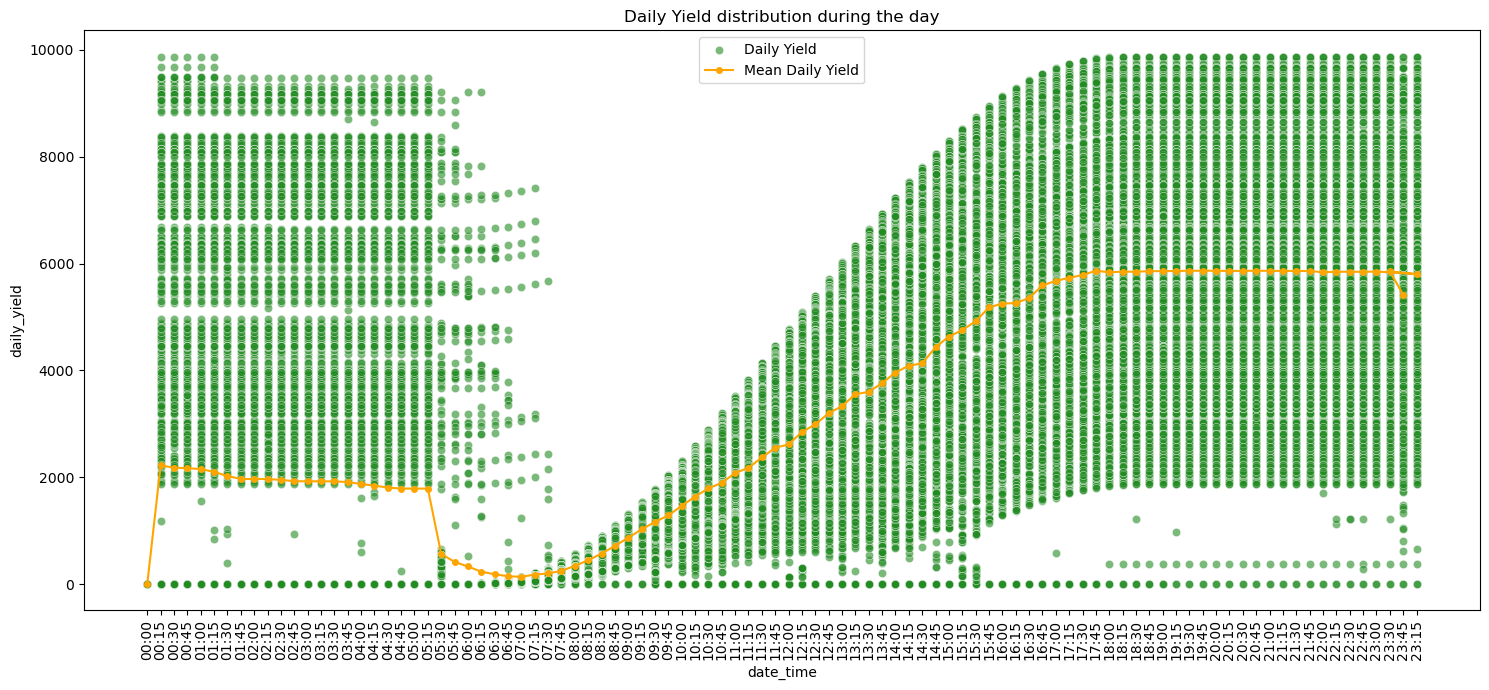

In [67]:
copy_gen_df = p1_gen_df
plot_copy = copy_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

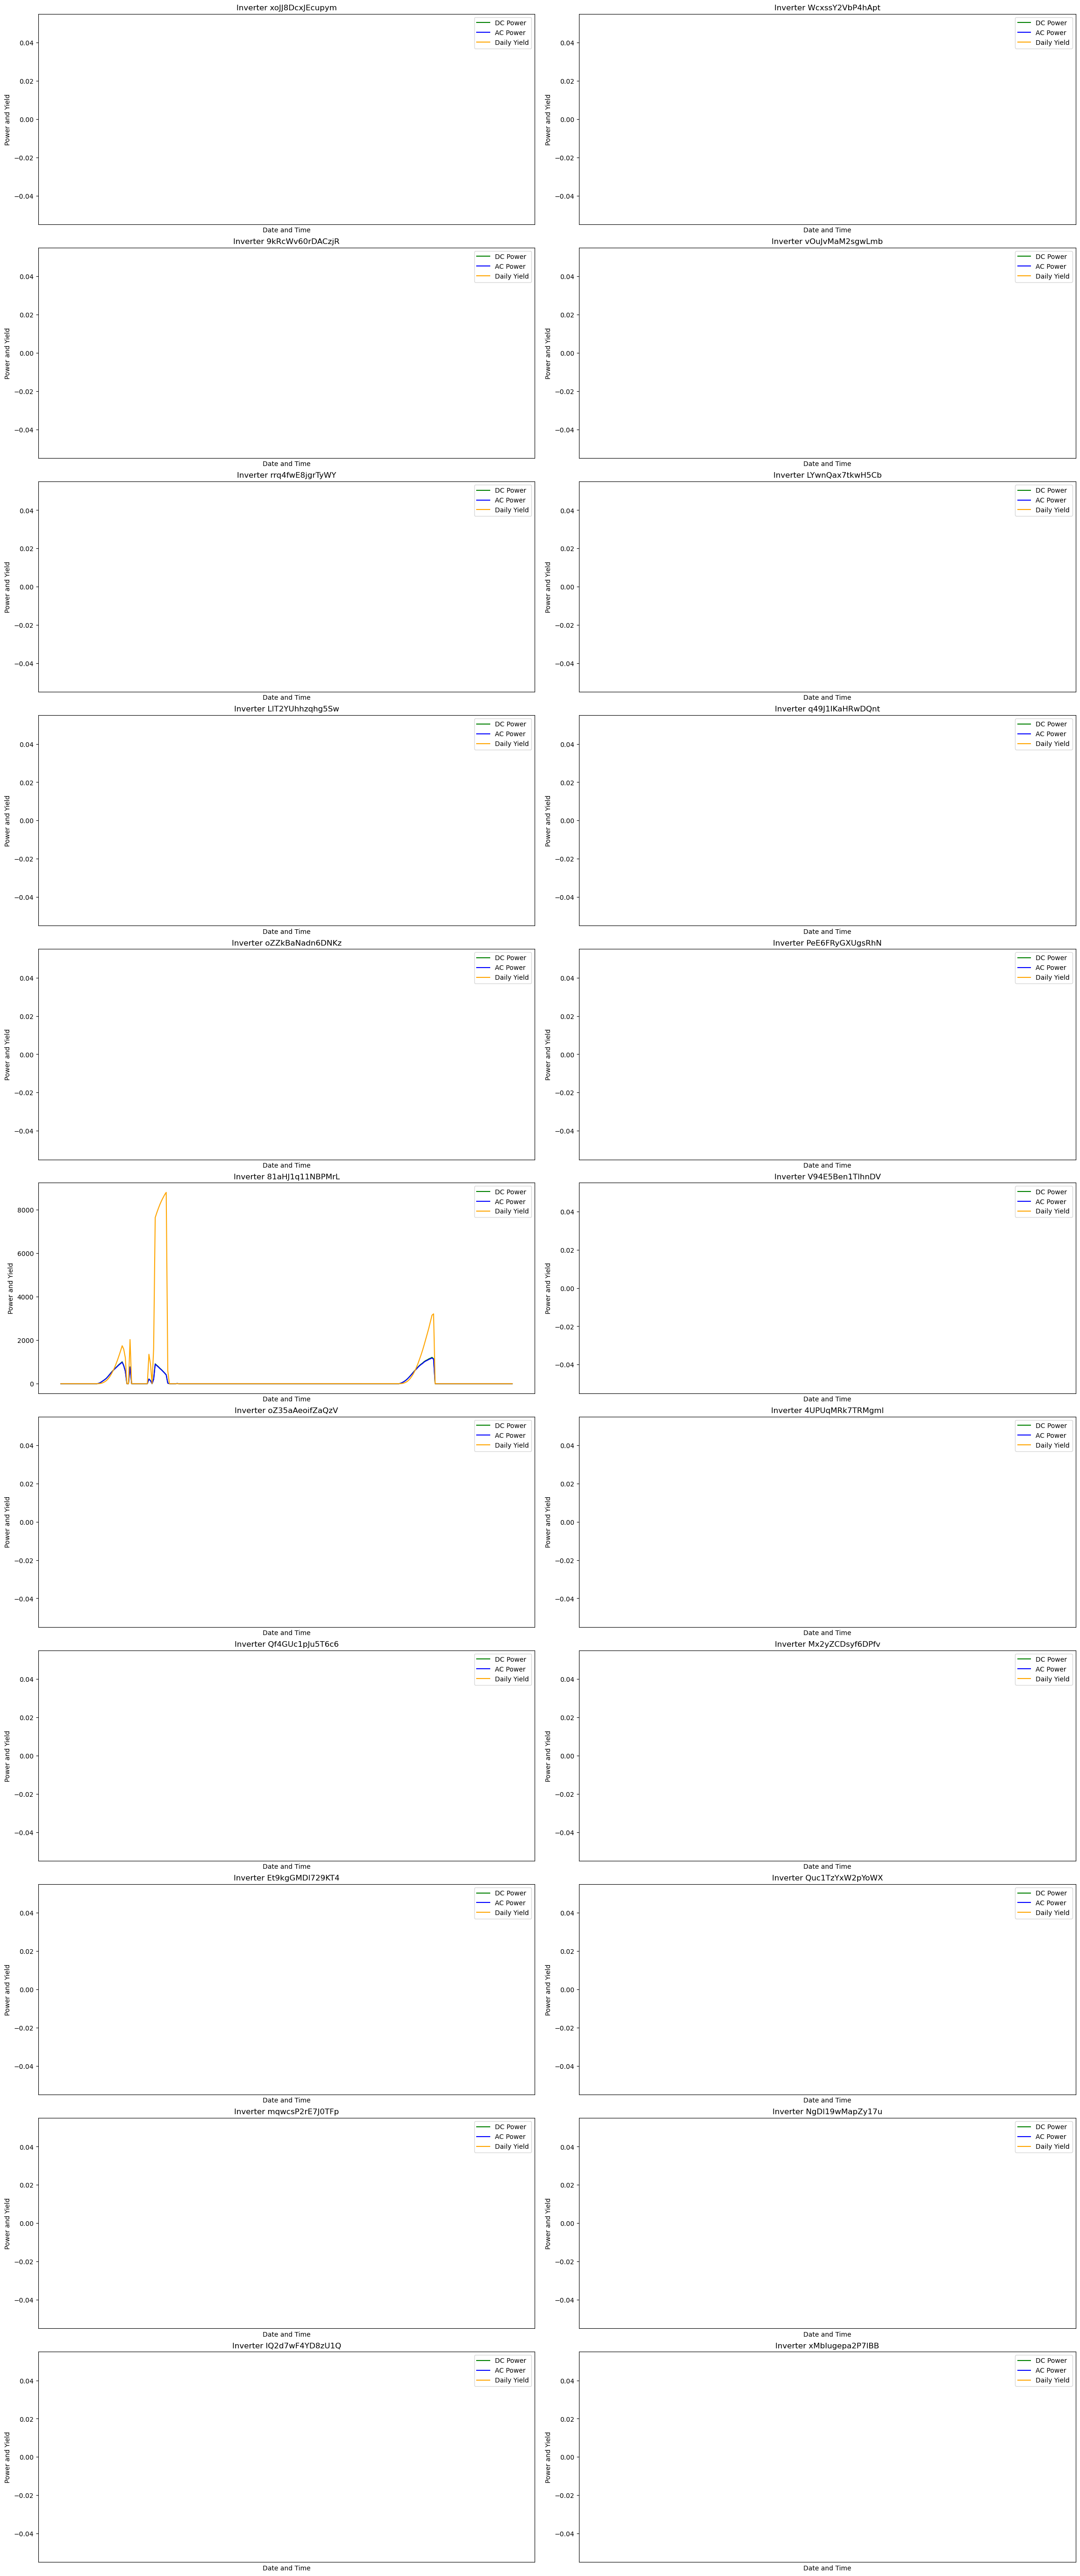

In [68]:
df_test = copy_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

are still present inverters with anomalies we select them 

In [69]:
anomaly_inverters = []
anomaly_inverters.append(p1_invertes[-2])
anomaly_inverters.append(p1_invertes[-3])
anomaly_inverters.append(p1_invertes[-5])
anomaly_inverters.append(p1_invertes[-6])

This code performs a process of detecting and correcting anomalies in the daily output of PV inverters in a DataFrame. The code focuses on inverters that have a daily energy production (daily_yield) of zero on certain days. For such days, it corrects the daily production values to the correct value observed at 4 p.m. 

In [70]:

for i in anomaly_inverters:

    inverter_p1 = p1_gen_df[p1_gen_df['source_key'] == i]
   
    inverter_p1['date_time_hours'] = inverter_p1['date_time'].dt.strftime('%H:%M')
   
    daily_yield_total = inverter_p1[inverter_p1['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    
    daily_yield_t = daily_yield_total[daily_yield_total['daily_yield'] == 0]
    
    daily_yield_t['date_only'] = daily_yield_t['date_time'].dt.strftime('%Y-%m-%d')
    date_list2 = daily_yield_t['date_only'].tolist()
    date_list_p1 = pd.to_datetime(date_list2)
    
    inverter_p1['date_only'] = inverter_p1['date_time'].dt.normalize()
    
    filtered_df2 = inverter_p1[inverter_p1['date_only'].isin(date_list_p1)]
    
    days = filtered_df2['date_only'].unique()
   
    for j in days:
        spec_day = filtered_df2[filtered_df2['date_only'] == j]
        correct_value_for_inv = spec_day[spec_day['date_time_hours'] == '16:00']
        
        if not correct_value_for_inv.empty:
            correct_value = correct_value_for_inv['daily_yield'].iloc[0]
            rows_to_change = spec_day[spec_day['date_time_hours'] > '16:00'].index
            p1_gen_df.loc[rows_to_change, 'daily_yield'] = correct_value

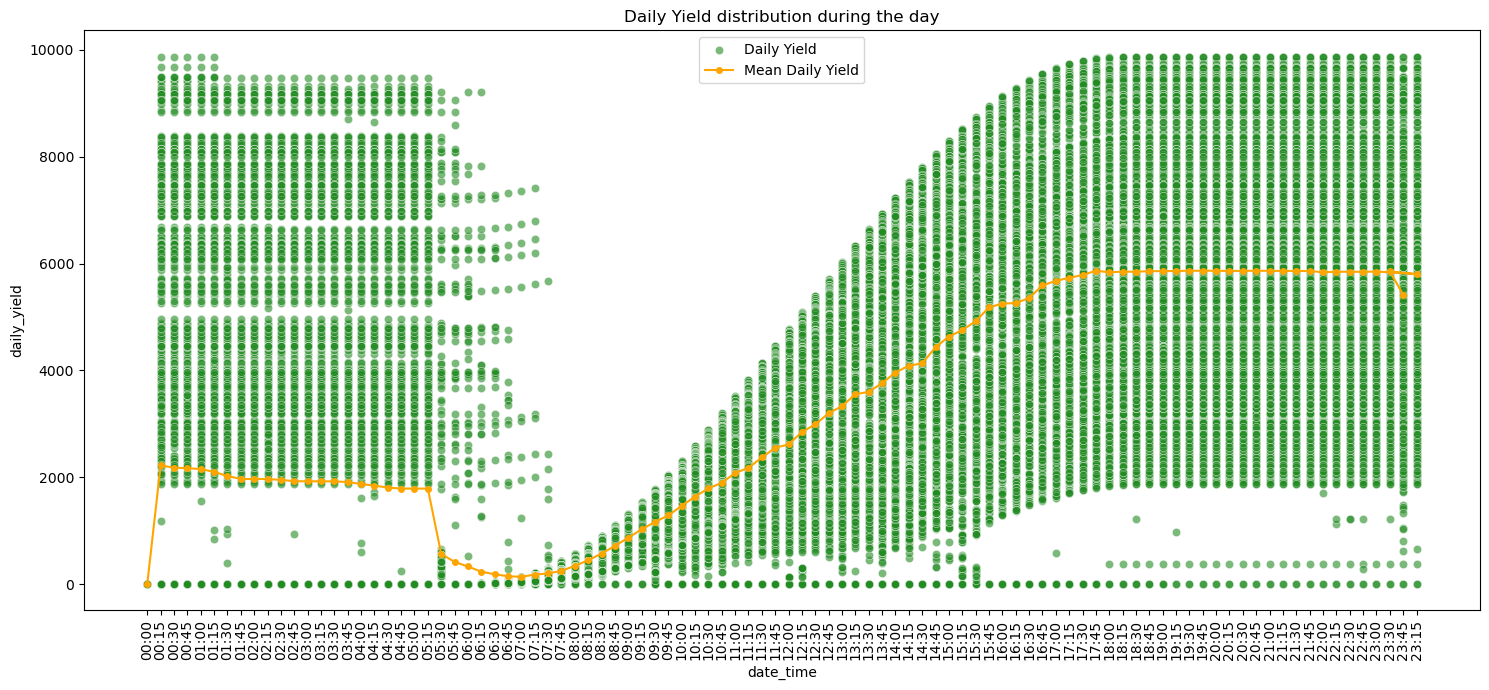

In [71]:
plot_copy = p1_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

We note the reduction in days with anomalies 

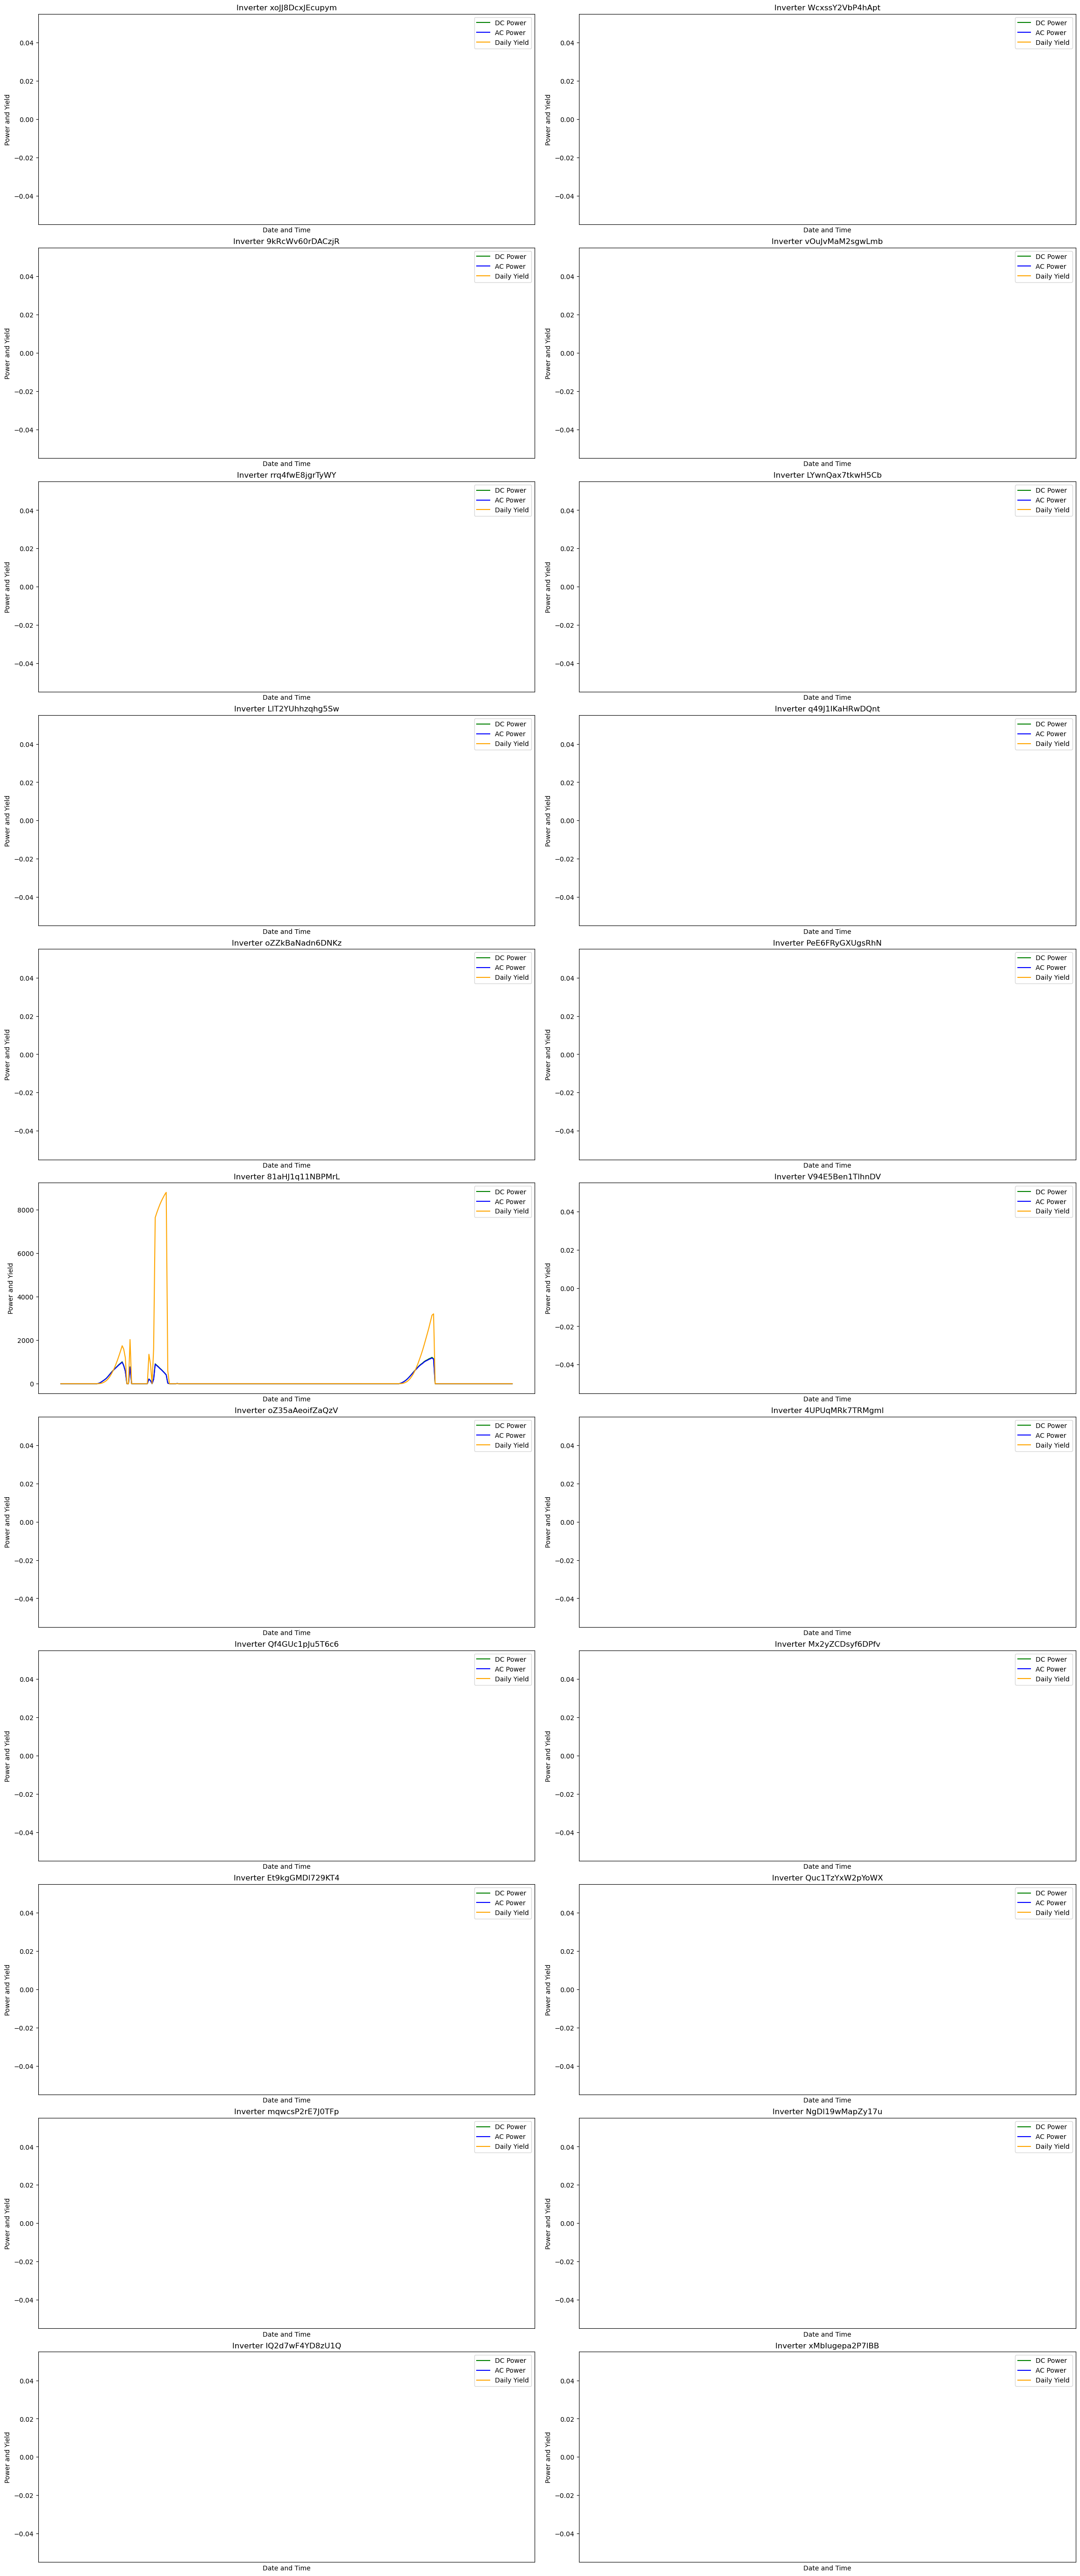

In [72]:
df_test = p1_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

In [73]:
#dropping date_time_hours column
p1_gen_df.drop(columns=['date_time_hours'], inplace=True)
#final dataset
p1_gen_df

date_time  plant_id       source_key  dc_power  ac_power  \
0     2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1     2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2     2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3     2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4     2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
...                   ...       ...              ...       ...       ...   
67693 2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694 2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695 2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696 2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       daily_yield   total_yield  
0              0.0  2.429011e+06  
1              0.0  1.215279e+09  
2              0.0  2.247720e+09  
3              0.0  1.704250e+06  
4              0.0  1.994153e+07  
...            ...           ...  
67693       4157.0  5.207580e+05  
67694       3931.0  1.211314e+08  
67695       4322.0  2.427691e+06  
67696       4218.0  1.068964e+08  
67697       4316.0  2.093357e+08  

[67698 rows x 7 columns]

<h2>Merging P1 Power Generator Dataset with P1 Weather Dataset</h2>

In [74]:
p1= pd.merge(p1_gen_df, p1_wea_df, on=['date_time'], how='inner')
p1 = p1.drop(columns=['plant_id_x', 'plant_id_y', 'source_key_y'])
#p1.head(5)
p1['dc_power'] = p1['dc_power'] / 10

Total_ac_P1 = p1.groupby(['source_key_x'])['ac_power'].sum().reset_index()
Total_dc_P1 = p1.groupby(['source_key_x'])['dc_power'].sum().reset_index()
Total_dcac_P1 = pd.merge(Total_dc_P1,Total_ac_P1, on=['source_key_x'], how='inner')
Total_dcac_P1['AC/DC'] = (Total_ac_P1['ac_power'] / Total_dc_P1['dc_power'])*100
print(f"Efficency of inverters in Plant1:\n {Total_dcac_P1}")

Efficency of inverters in Plant1:
        source_key_x      dc_power       ac_power       AC/DC
0   4UPUqMRk7TRMgml  88606.589535  866343.458217  977.741568
1   81aHJ1q11NBPMrL  75086.893917  734384.421081  978.046078
2   9kRcWv60rDACzjR  79732.421351  779819.329933  978.045463
3   Et9kgGMDl729KT4  60139.605098  588615.708104  978.748875
4   IQ2d7wF4YD8zU1Q  67102.339241  656138.839189  977.818131
5   LYwnQax7tkwH5Cb  63969.632669  626022.753183  978.624899
6   LlT2YUhhzqhg5Sw  80006.265261  782521.577770  978.075373
7   Mx2yZCDsyf6DPfv  90926.652414  889000.103655  977.711243
8   NgDl19wMapZy17u  64277.678207  628593.658634  977.934605
9   PeE6FRyGXUgsRhN  80919.102512  791408.775368  978.024658
10  Qf4GUc1pJu5T6c6  88930.239766  869493.688795  977.725565
11  Quc1TzYxW2pYoWX  55233.154557  540827.463128  979.171781
12  V94E5Ben1TlhnDV  85437.566893  835443.639984  977.841095
13  WcxssY2VbP4hApt  79935.024304  781608.549098  977.804856
14  mqwcsP2rE7J0TFp  64802.324477  633721.740530  

In [75]:
#exporting the df
p1.to_csv('second_plant.csv',index=False)

merged dataset

In [76]:
p1.head(10)

date_time     source_key_x  dc_power  ac_power  daily_yield   total_yield  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0          0.0  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0          0.0  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0          0.0  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0          0.0  1.994153e+07   
5 2020-05-15  LYwnQax7tkwH5Cb       0.0       0.0          0.0  1.794959e+09   
6 2020-05-15  LlT2YUhhzqhg5Sw       0.0       0.0          0.0  2.825928e+08   
7 2020-05-15  Mx2yZCDsyf6DPfv       0.0       0.0          0.0  2.453646e+06   
8 2020-05-15  NgDl19wMapZy17u       0.0       0.0          0.0  1.115126e+08   
9 2020-05-15  PeE6FRyGXUgsRhN       0.0       0.0          0.0  1.348351e+09   

   ambient_temperature  module_temperature  irradiation  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0  
5            27.004764           25.060789          0.0  
6            27.004764           25.060789          0.0  
7            27.004764           25.060789          0.0  
8            27.004764           25.060789          0.0  
9            27.004764           25.060789          0.0

<h3>Correlation Matrix of the Merged Dataset P1</H3>

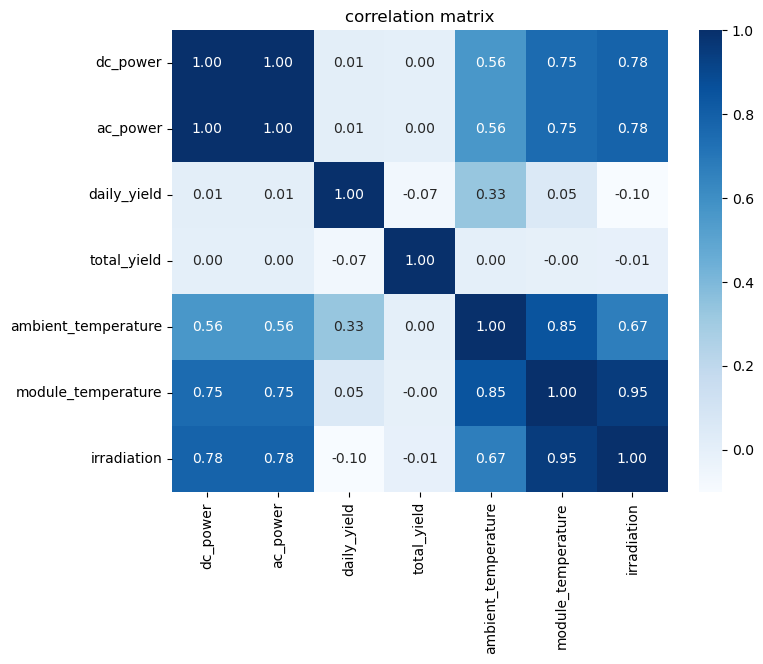

In [77]:
clean_df = p1.copy()
clean_df = clean_df.drop(['source_key_x','date_time'], axis = 1)
corr_matrix = clean_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('correlation matrix')
plt.show()

Strongly correlated variables: dc_power, ac_power, irradiation and module_temperature.

Weakly correlated variables: daily_yield and total_yield.

Implications for modeling: the strong correlation between some variables suggests that there may be multicollinearity to consider in regression models.

<H1>Statistical Models</H1>

<h2>Questions</h2>

1. Can we predict the energy power prodcution?

2. Can we identify the need for panel cleaning/maintenance?



<h3>Importing Libraries</h3>

In [78]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

<h2>Importing the Dataset</h2>

In [79]:
data = pd.read_csv('second_plant.csv')

In [80]:
data.head(5)

date_time     source_key_x  dc_power  ac_power  daily_yield  \
0  2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0          0.0   
1  2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0          0.0   
2  2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0          0.0   
3  2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0          0.0   
4  2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0          0.0   

    total_yield  ambient_temperature  module_temperature  irradiation  
0  2.429011e+06            27.004764           25.060789          0.0  
1  1.215279e+09            27.004764           25.060789          0.0  
2  2.247720e+09            27.004764           25.060789          0.0  
3  1.704250e+06            27.004764           25.060789          0.0  
4  1.994153e+07            27.004764           25.060789          0.0

---------------------------------

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67676 entries, 0 to 67675
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            67676 non-null  object 
 1   source_key_x         67676 non-null  object 
 2   dc_power             67676 non-null  float64
 3   ac_power             67676 non-null  float64
 4   daily_yield          67676 non-null  float64
 5   total_yield          67676 non-null  float64
 6   ambient_temperature  67676 non-null  float64
 7   module_temperature   67676 non-null  float64
 8   irradiation          67676 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.6+ MB


<h2>Data Pre-Processing</h2>

The activity of data cleaning, correction of the outliers, correction of anomalies has been already done

<h3>Distribution of the features</h3>

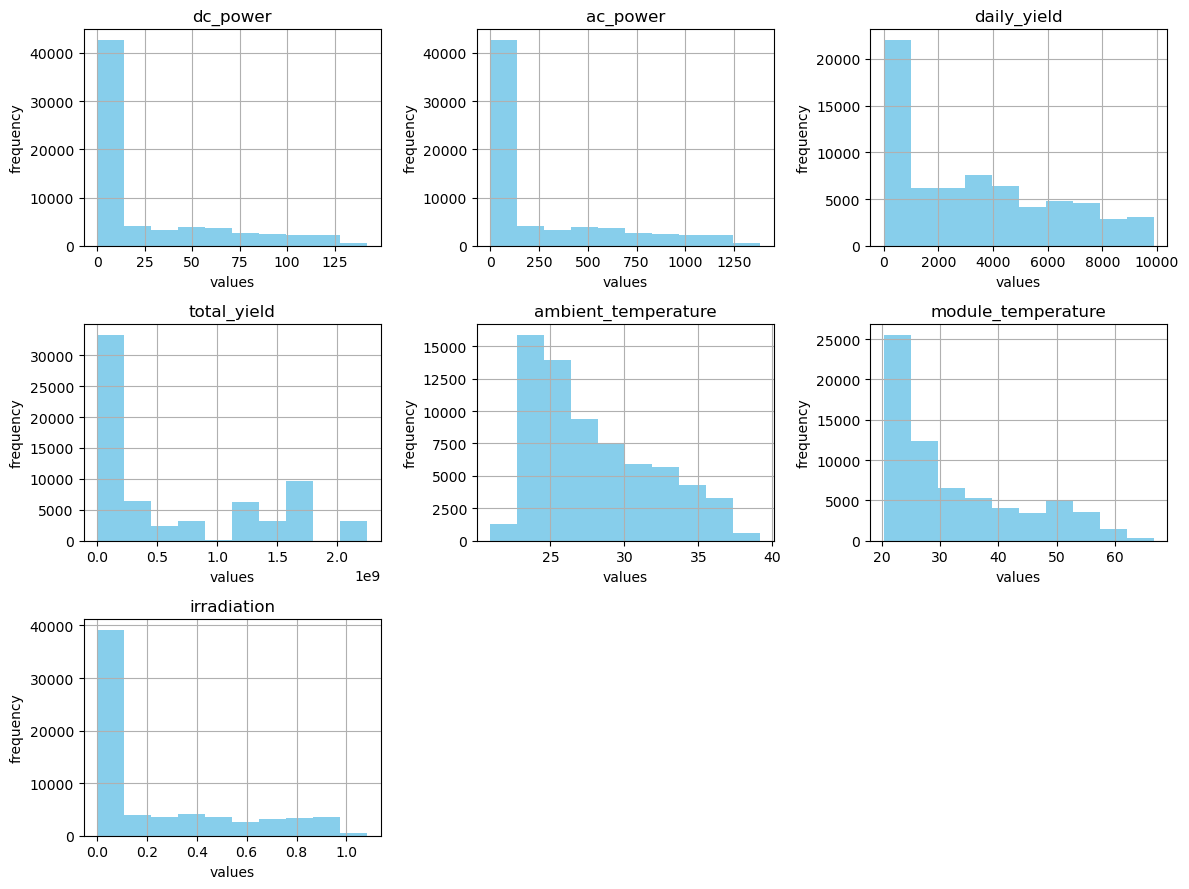

In [82]:
df = data.drop(['source_key_x','date_time'], axis= 1)
columns_per_row = 3
num_columns = df.shape[1]
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

#subplot
fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(12, 9))
axs = axs.flatten()

for column in range(num_columns):
    axs[column].hist(df[df.columns[column]], color='skyblue')
    axs[column].set_title(df.columns[column])
    axs[column].set_xlabel('values')
    axs[column].set_ylabel('frequency')
    axs[column].grid()

# hide empty graphs
for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


This is the distribution of the variables; we can see that they are skewed to the left, but we will not handle this as an error in data registration because it is consistent with the observed phenomena in our dataset.

<h3>Encode the variable: 'source_key_x'</h3>

since this is a categorical varible, in order to allow the models to take it in consideration we can create the dummy varibales from it 

In [83]:
#inverter encoding
df_encoded = pd.get_dummies(data, columns=['source_key_x'])
df_encoded

date_time  dc_power  ac_power  daily_yield   total_yield  \
0      2020-05-15 00:00:00       0.0       0.0          0.0  2.429011e+06   
1      2020-05-15 00:00:00       0.0       0.0          0.0  1.215279e+09   
2      2020-05-15 00:00:00       0.0       0.0          0.0  2.247720e+09   
3      2020-05-15 00:00:00       0.0       0.0          0.0  1.704250e+06   
4      2020-05-15 00:00:00       0.0       0.0          0.0  1.994153e+07   
...                    ...       ...       ...          ...           ...   
67671  2020-06-17 23:45:00       0.0       0.0       4157.0  5.207580e+05   
67672  2020-06-17 23:45:00       0.0       0.0       3931.0  1.211314e+08   
67673  2020-06-17 23:45:00       0.0       0.0       4322.0  2.427691e+06   
67674  2020-06-17 23:45:00       0.0       0.0       4218.0  1.068964e+08   
67675  2020-06-17 23:45:00       0.0       0.0       4316.0  2.093357e+08   

       ambient_temperature  module_temperature  irradiation  \
0                27.004764           25.060789          0.0   
1                27.004764           25.060789          0.0   
2                27.004764           25.060789          0.0   
3                27.004764           25.060789          0.0   
4                27.004764           25.060789          0.0   
...                    ...                 ...          ...   
67671            23.202871           22.535908          0.0   
67672            23.202871           22.535908          0.0   
67673            23.202871           22.535908          0.0   
67674            23.202871           22.535908          0.0   
67675            23.202871           22.535908          0.0   

       source_key_x_4UPUqMRk7TRMgml  source_key_x_81aHJ1q11NBPMrL  ...  \
0                                 1                             0  ...   
1                                 0                             1  ...   
2                                 0                             0  ...   
3                                 0                             0  ...   
4                                 0                             0  ...   
...                             ...                           ...  ...   
67671                             0                             0  ...   
67672                             0                             0  ...   
67673                             0                             0  ...   
67674                             0                             0  ...   
67675                             0                             0  ...   

       source_key_x_V94E5Ben1TlhnDV  source_key_x_WcxssY2VbP4hApt  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
67671                             0                             0   
67672                             0                             0   
67673                             0                             0   
67674                             0                             0   
67675                             0                             0   

       source_key_x_mqwcsP2rE7J0TFp  source_key_x_oZ35aAeoifZaQzV  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
67671                             0                             0   
67672                             0                             0

<h2>Handle Multicollinearity</h2>

Thanks to the correlation matrix that we have seen before some features appear to be very strongly correlated with each others, in order to handle the problem of multicollinearity we will drop the variable 'dc_power' which has a 0.99 positive correlation with 'ac_power'. Despite the high correlation of the variables 'module_temperature' and 'ambient_temperature' since they provide different information that could be important to our model we try to keep them

In [84]:
#drop the column dc_power
df_encoded.drop(columns=['dc_power'],inplace=True)

<h3>'date_time' column management </h3>

In order to make it easy to manage this varibale we change its type in format date time and then we converts the values  from datetime objects to Unix timestamps (number of seconds elapsed since January 1, 1970). This step is necessary in order to allow our machine learning models to manage data in a date time format. 
A Unix timestamp is a continuous number representing time, which can be easily interpreted by models.

In [85]:
#changing in format date_time
df_encoded['date_time'] = pd.to_datetime(df_encoded['date_time'], format='%Y-%m-%d %H:%M:%S')
df_encoded['date_time'].dtype

dtype('<M8[ns]')

In [86]:
#transforming in timestamps
df_encoded['date_time'] = df_encoded['date_time'].apply(lambda x: x.timestamp())
df_encoded['date_time'].dtype

dtype('float64')

<h2>Can we predict the power generation for next couple of days? - this allows for better grid management</h2>

In order to answer that question we try to build different models and find the best one

In [88]:
#Setting the variables
X = df_encoded.drop(['daily_yield','total_yield'], axis=1)
y = df_encoded['daily_yield'] #the target variable which we are trying to predict is the daily yield

<H2>MODEL SELECTION</H2>

We will try to build different models and we will evalutate their perfomance on the Test set in order to choose the best one

<h2>Multiple Linear Regression</h2>

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy import stats
import statsmodels.api as sm 

In [90]:
#creation of the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
#creation of the multiple linear regression model
multiple_lr = LinearRegression()

In [92]:
#training the model
multiple_lr.fit(X_train, y_train)

LinearRegression()

In [93]:
#predict on the test set
y_pred_multiple_lr = multiple_lr.predict(X_test)

In [94]:
#compute R2 on the test set
r2_multiple_lr = r2_score(y_test, y_pred_multiple_lr)
print(f'R² for Multiple Linear Regression: {r2_multiple_lr}')

R² for Multiple Linear Regression: 0.37048706611968973


In [95]:
#Same model but using the library statsmodel
# Add a constant term to the predictors matrix
X_train_with_const = sm.add_constant(X_train) #add a column of 1 on X_train that it will be used to compute the intercept

# Create a linear regression model using statsmodels
lr_sm = sm.OLS(y_train, X_train_with_const)
results = lr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            daily_yield   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     1232.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:18:32   Log-Likelihood:            -4.9635e+05
No. Observations:               54140   AIC:                         9.928e+05
Df Residuals:                   54113   BIC:                         9.930e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [96]:
#coefficients
coefficients = results.params
print("Coefficients:")
print(coefficients)

Coefficients:
const                          -836501.151271
date_time                            0.000542
ac_power                             0.903680
ambient_temperature                650.215655
module_temperature                 -68.794307
irradiation                      -4938.110460
source_key_x_4UPUqMRk7TRMgml    -37368.166035
source_key_x_81aHJ1q11NBPMrL    -38724.218833
source_key_x_9kRcWv60rDACzjR    -38556.794909
source_key_x_Et9kgGMDl729KT4    -39002.220863
source_key_x_IQ2d7wF4YD8zU1Q    -37211.126595
source_key_x_LYwnQax7tkwH5Cb    -38738.371596
source_key_x_LlT2YUhhzqhg5Sw    -38199.454549
source_key_x_Mx2yZCDsyf6DPfv    -37613.281500
source_key_x_NgDl19wMapZy17u    -37339.801615
source_key_x_PeE6FRyGXUgsRhN    -38052.394813
source_key_x_Qf4GUc1pJu5T6c6    -37732.301368
source_key_x_Quc1TzYxW2pYoWX    -38642.929354
source_key_x_V94E5Ben1TlhnDV    -38420.864425
source_key_x_WcxssY2VbP4hApt    -38092.215997
source_key_x_mqwcsP2rE7J0TFp    -37992.854934
source_key_x_oZ35aAe

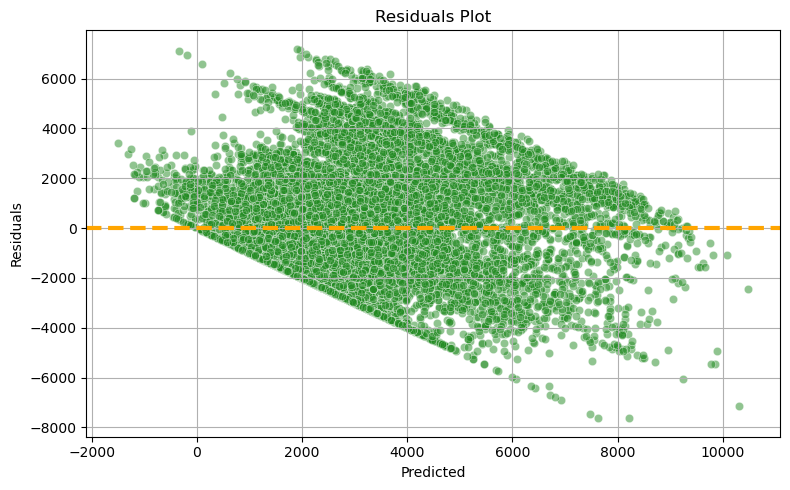

In [97]:
#Plot of the Residuals
custom_palette = ['forestgreen','orange']
residuals = y_test - y_pred_multiple_lr
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_multiple_lr, y=residuals, color=custom_palette[0], alpha=0.5)
plt.axhline(y=0, color=custom_palette[1], linestyle='--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

The residuals graph represents the residuals (difference between observed and predicted values) from the predicted values.
This  dispersion indicates a potential problem of heteroscedasticity, that is, the variance of the residuals is not constant across the range of predicted values.
This may affect the reliability of statistical inferences from the regression model.

In order to address the problem of heteroscedasticity we can try to make the logaritm of the response variable y

In [98]:
y_log = np.log(y+1) #applying the logarithm to the variable y

#splitting the dataset with log y
X_train2, X_test2, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

#creating the model
lr_log = LinearRegression()

#train the model
lr_log.fit(X_train2, y_train_log)

#prediction
y_pred_log = lr_log.predict(X_test2)

#R2 on test set
r2_log_model = r2_score(y_test_log, y_pred_log)
print(f'R² for Multiple Linear Regression with Log-transformed : {r2_log_model}')
print(f'R² for Multiple Linear Regression: {r2_multiple_lr}')


R² for Multiple Linear Regression with Log-transformed : 0.3085947107595459
R² for Multiple Linear Regression: 0.37048706611968973


As we can see despite the logartim transformation the model is not improved, so it will be wise to try a different model

<H2>Forward Stepwie Selection</h2>

We try to propose an alternative fitting procedure in particular we try to use the Forward Stepwise Selection which is a subset selection technique to which we try to identify a subset of predictors  that contribute most to predicting the dependent variable

forward stepwise selection, This method can produce more robust models than standard multiple linear regression because it selects variables based on their ability to improve the model, reducing the risk of overfitting and potentially improving residual handling.

In [99]:
import itertools 
import time
from sklearn import linear_model

In [100]:
#function to fit the linear regression model

def fit_linear_reg(X,Y):
    model_k = linear_model.LinearRegression(fit_intercept=True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R2 = model_k.score(X,Y)
    return RSS,R2

In [101]:
#initializing the variables:
y = y_train
x = X_train
k = X_train.shape[1] #number of predictors

remaining_features = list(x.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf

    for combo in itertools.combinations(remaining_features,1):
        RSS = fit_linear_reg(x[list(combo) + features],y)

        if RSS[0] < best_RSS:
            best_RSS = RSS[0]
            best_R_squared = RSS[1] 
            best_feature = combo[0]
    
    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)

    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [102]:
#Displaying results of the first 4 steps
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['ambient_temperature'], 413371802131),
 (2, ['ambient_temperature', 'irradiation'], 325462068536),
 (3, ['ambient_temperature', 'irradiation', 'date_time'], 313963690915),
 (4,
  ['ambient_temperature',
   'irradiation',
   'date_time',
   'source_key_x_xMbIugepa2P7lBB'],
  308232115025)]

Comparing models: AIC, BIC, Mallows'CP

In [103]:
#Combining forward stepwise results into a new DataFrame
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [104]:
#Initializing useful variables
m = len(y)
p = 28
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

features           RSS  \
1                               [ambient_temperature]  4.133718e+11   
2                  [ambient_temperature, irradiation]  3.254621e+11   
3       [ambient_temperature, irradiation, date_time]  3.139637e+11   
4   [ambient_temperature, irradiation, date_time, ...  3.082321e+11   
5   [ambient_temperature, irradiation, date_time, ...  3.043729e+11   
6   [ambient_temperature, irradiation, date_time, ...  3.023521e+11   
7   [ambient_temperature, irradiation, date_time, ...  3.009246e+11   
8   [ambient_temperature, irradiation, date_time, ...  2.994633e+11   
9   [ambient_temperature, irradiation, date_time, ...  2.981788e+11   
10  [ambient_temperature, irradiation, date_time, ...  2.972803e+11   
11  [ambient_temperature, irradiation, date_time, ...  2.962646e+11   
12  [ambient_temperature, irradiation, date_time, ...  2.954976e+11   
13  [ambient_temperature, irradiation, date_time, ...  2.946822e+11   
14  [ambient_temperature, irradiation, date_time, ...  2.940105e+11   
15  [ambient_temperature, irradiation, date_time, ...  2.933700e+11   
16  [ambient_temperature, irradiation, date_time, ...  2.930345e+11   
17  [ambient_temperature, irradiation, date_time, ...  2.926523e+11   
18  [ambient_temperature, irradiation, date_time, ...  2.923629e+11   
19  [ambient_temperature, irradiation, date_time, ...  2.920010e+11   
20  [ambient_temperature, irradiation, date_time, ...  2.916997e+11   
21  [ambient_temperature, irradiation, date_time, ...  2.914942e+11   
22  [ambient_temperature, irradiation, date_time, ...  2.912617e+11   
23  [ambient_temperature, irradiation, date_time, ...  2.912227e+11   
24  [ambient_temperature, irradiation, date_time, ...  2.912115e+11   
25  [ambient_temperature, irradiation, date_time, ...  2.912087e+11   
26  [ambient_temperature, irradiation, date_time, ...  2.912087e+11   
27  [ambient_temperature, irradiation, date_time, ...  2.912087e+11   

    R_squared  numb_features           C_p       AIC       BIC  R_squared_adj  
1    0.108298              1  7.635437e+06  1.418780  1.418944       0.108281  
2    0.297932              2  6.011888e+06  1.117100  1.117429       0.297906  
3    0.322735              3  5.799704e+06  1.077673  1.078166       0.322698  
4    0.335099              4  5.694037e+06  1.058039  1.058696       0.335050  
5    0.343424              5  5.622954e+06  1.044830  1.045652       0.343363  
6    0.347783              6  5.585827e+06  1.037931  1.038918       0.347711  
7    0.350863              7  5.559658e+06  1.033069  1.034220       0.350779  
8    0.354015              8  5.532867e+06  1.028091  1.029406       0.353919  
9    0.356786              9  5.509340e+06  1.023719  1.025198       0.356679  
10   0.358724             10  5.492944e+06  1.020672  1.022316       0.358605  
11   0.360915             11  5.474381e+06  1.017223  1.019031       0.360785  
12   0.362569             12  5.460412e+06  1.014628  1.016600       0.362428  
13   0.364328             13  5.445550e+06  1.011866  1.014003       0.364176  
14   0.365777             14  5.433343e+06  1.009598  1.011899       0.365613  
15   0.367159             15  5.421711e+06  1.007436  1.009902       0.366983  
16   0.367883             16  5.415714e+06  1.006322  1.008952       0.367696  
17   0.368707             17  5.408853e+06  1.005047  1.007841       0.368509  
18   0.369331             18  5.403706e+06  1.004091  1.007049       0.369122  
19   0.370112             19  5.397220e+06  1.002885  1.006009       0.369891  
20   0.370762             20  5.391854e+06  1.001888  1.005176       0.370529  
21   0.371205             21  5.388257e+06  1.001220  1.004672       0.370961  
22   0.371707             22  5.384161e+06  1.000459  1.004075       0.371451  
23   0.371791             23  5.383640e+06  1.000362  1.004143       0.371524  
24   0.371815             24  5.383631e+06  1.000360  1.004305       0.371537  
25   0.371821             25  5.383779e+06  1.000388  1.

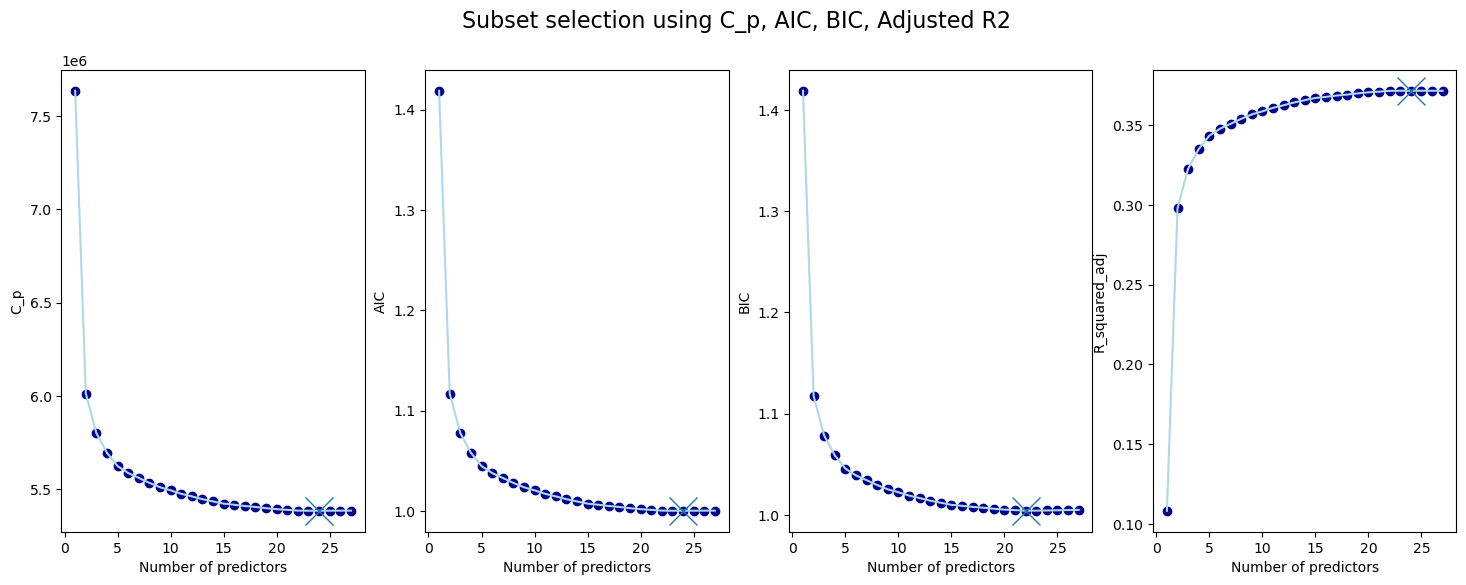

In [105]:
#Plotting the computed values as a function of number of features
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [106]:
#finding the best model based on R_squared_adj
best_model = df1.loc[df1['R_squared_adj'] == df1['R_squared_adj'].max()]
best_model

features           RSS  \
24  [ambient_temperature, irradiation, date_time, ...  2.912115e+11   

    R_squared  numb_features           C_p      AIC       BIC  R_squared_adj  
24   0.371815             24  5.383631e+06  1.00036  1.004305       0.371537

In [107]:
#features of the best model
list(best_model['features'])

[['ambient_temperature',
  'irradiation',
  'date_time',
  'source_key_x_xMbIugepa2P7lBB',
  'ac_power',
  'source_key_x_Et9kgGMDl729KT4',
  'source_key_x_IQ2d7wF4YD8zU1Q',
  'source_key_x_4UPUqMRk7TRMgml',
  'source_key_x_NgDl19wMapZy17u',
  'source_key_x_Mx2yZCDsyf6DPfv',
  'source_key_x_q49J1IKaHRwDQnt',
  'source_key_x_Qf4GUc1pJu5T6c6',
  'source_key_x_oZ35aAeoifZaQzV',
  'source_key_x_vOuJvMaM2sgwLmb',
  'module_temperature',
  'source_key_x_LYwnQax7tkwH5Cb',
  'source_key_x_81aHJ1q11NBPMrL',
  'source_key_x_Quc1TzYxW2pYoWX',
  'source_key_x_rrq4fwE8jgrTyWY',
  'source_key_x_9kRcWv60rDACzjR',
  'source_key_x_oZZkBaNadn6DNKz',
  'source_key_x_V94E5Ben1TlhnDV',
  'source_key_x_LlT2YUhhzqhg5Sw',
  'source_key_x_mqwcsP2rE7J0TFp']]

In [108]:
#R2 of the best model
stepwise_selection_model = best_model.copy()
r2_forward = stepwise_selection_model['R_squared'].iloc[0]
r2_forward

0.37181511846282633

<h2>Lasso Regression</h2>

Since we noticed an improvement in performance using forward stepwise selection, we try using an even less flexible linear model

In [109]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [110]:
#lasso scaled variable
#standardization of the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
#lasso scaled
#creation of the lasso model
alphas = [0.2, 0.5, 0.7, 1.0, 5.0, 10.0, 30.0]

best_alpha = None
max_r2 = 0

for alpha in alphas:
    
    lasso_model = Lasso(alpha=alpha)
    
    #train
    lasso_model.fit(X_train_scaled, y_train)
    
    #prediction
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    
    #R2
    r2 = r2_score(y_test, y_pred_lasso)
    if r2 > max_r2:
        max_r2 = r2
        best_alpha = alpha

In [112]:
print(f"Best R² on test set: {max_r2:.4f} with alpha: {best_alpha}")

Best R² on test set: 0.3705 with alpha: 0.2


In [113]:
#Lasso Model with best alpha
lasso = Lasso(alpha=best_alpha)
    
lasso.fit(X_train_scaled, y_train)

y_pred_lasso2 = lasso.predict(X_test_scaled)
    
#R2
r2_lasso = r2_score(y_test, y_pred_lasso2)
r2_lasso

0.3704865310761468

In [114]:
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coef

Feature  Coefficient
0                      date_time   463.527323
1                       ac_power   326.287069
2            ambient_temperature  2613.736288
3             module_temperature  -764.476359
4                    irradiation -1529.601776
5   source_key_x_4UPUqMRk7TRMgml   152.039824
6   source_key_x_81aHJ1q11NBPMrL  -135.587509
7   source_key_x_9kRcWv60rDACzjR   -99.825431
8   source_key_x_Et9kgGMDl729KT4  -193.575160
9   source_key_x_IQ2d7wF4YD8zU1Q   161.276464
10  source_key_x_LYwnQax7tkwH5Cb  -138.031449
11  source_key_x_LlT2YUhhzqhg5Sw   -23.024188
12  source_key_x_Mx2yZCDsyf6DPfv   101.611775
13  source_key_x_NgDl19wMapZy17u   137.677094
14  source_key_x_PeE6FRyGXUgsRhN     8.193122
15  source_key_x_Qf4GUc1pJu5T6c6    75.620039
16  source_key_x_Quc1TzYxW2pYoWX  -116.996392
17  source_key_x_V94E5Ben1TlhnDV   -70.117978
18  source_key_x_WcxssY2VbP4hApt    -0.000000
19  source_key_x_mqwcsP2rE7J0TFp    17.938994
20  source_key_x_oZ35aAeoifZaQzV    70.667543
21  source_key_x_oZZkBaNadn6DNKz   -77.133487
22  source_key_x_q49J1IKaHRwDQnt    99.005362
23  source_key_x_rrq4fwE8jgrTyWY  -116.717303
24  source_key_x_vOuJvMaM2sgwLmb    49.291413
25  source_key_x_xMbIugepa2P7lBB   311.640008
26  source_key_x_xoJJ8DcxJEcupym    -0.000000

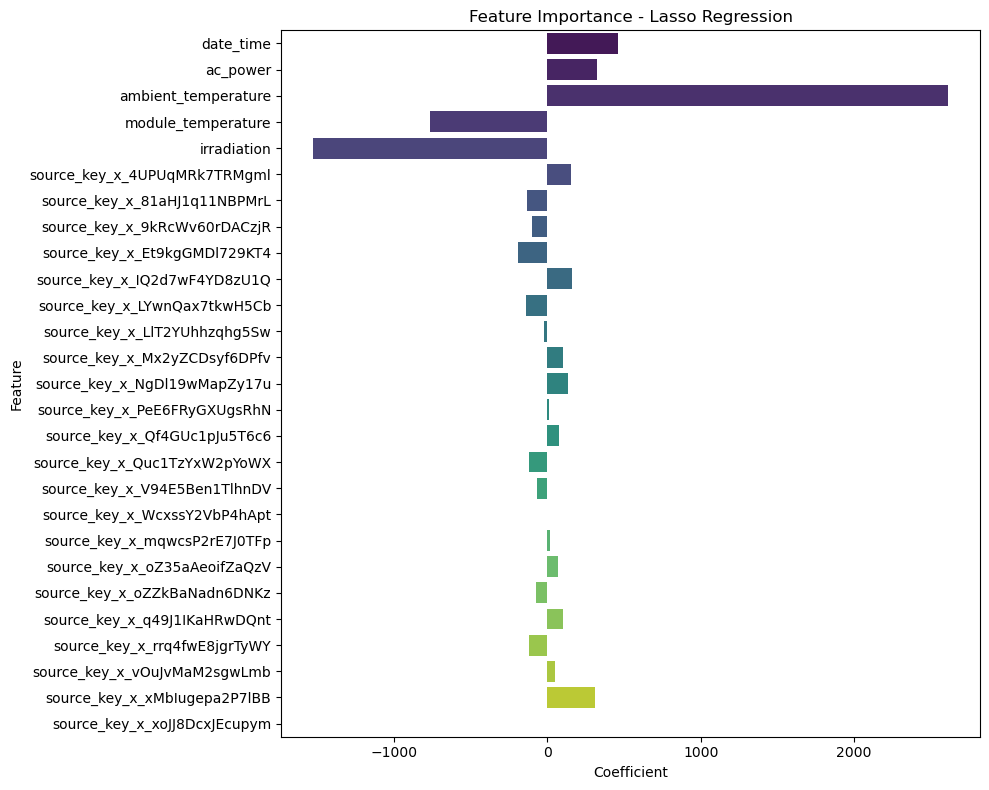

In [115]:
# Example DataFrame with coefficients (replace with your actual data)
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Lasso Regression')
plt.tight_layout()
plt.show()

Horizontal bars: Each bar in the graph represents a predictor variable (feature). The length of the bar corresponds to the  value of the estimated coefficient for that variable in the Lasso model. the longer bars represent the coefficients with higher value thus those that were less penalized less pushed to 0 by the lasso 

<h2>Decision Tree Regression</h2>

Since we have noticed that linear models do not have optimal performance let us try using a nonlinear model and that does not assume that the variance of the errors is constant.

In [116]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
dt_model = DecisionTreeRegressor(max_depth=5)  # Max_depth limits the deep of the tree to avoid overfitting
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [118]:
#prediction
y_pred_dt = dt_model.predict(X_test)

#R2
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R² on test set for Decision Tree Regression: {r2_dt:.3f}')

R² on test set for Decision Tree Regression: 0.511


<h2>Random Forest Regression</h2>

The Random Forest is composed of a set of Decision Trees, each of which is trained on a random subset of the training data. This approach reduces the overall variance of the model compared to a single Decision Tree, making it less sensitive to variations in the data and outliers. It is a more flexible model that can capture complex, nonlinear relationships between the predictor variables and the response variable. By combining many decision trees (ensembles), it can better fit complex models and nonlinear data. Since decision tree tends to soffer of high variance this ensamble method try to work in order to reduce it

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
#Random forest with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
# Prediction
y_pred_rf = rf_model.predict(X_test)

#R2
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R² on test set for  Random Forest Regression: {r2_rf:.3f}')

R² on test set for  Random Forest Regression: 0.947


<h2>Performance Evaluation</h2>

In [122]:
print(f'R² for Multiple Linear Regression with Log-transformed : {r2_log_model}')
print(f'R2 of Lasso Regression {r2_lasso}')
print(f'R2 of Multiple Linear Regression: {r2_multiple_lr}')
print(f'R2 of Forward Stepwise Selection: {r2_forward}')
print(f'R2 of Decision Tree Regressor: {r2_dt}')
print(f'R2 of Random Forest Regression: {r2_rf}')

R² for Multiple Linear Regression with Log-transformed : 0.3085947107595459
R2 of Lasso Regression 0.3704865310761468
R2 of Multiple Linear Regression: 0.37048706611968973
R2 of Forward Stepwise Selection: 0.37181511846282633
R2 of Decision Tree Regressor: 0.510907430555463
R2 of Random Forest Regression: 0.9472503717585619


# Classification for Detecting Performance

In [143]:
plant_1 = pd.read_csv('second_plant.csv')

In [144]:
plant_1

date_time     source_key_x  dc_power  ac_power  daily_yield  \
0      2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0          0.0   
1      2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0          0.0   
2      2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0          0.0   
3      2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0          0.0   
4      2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0          0.0   
...                    ...              ...       ...       ...          ...   
67671  2020-06-17 23:45:00  q49J1IKaHRwDQnt       0.0       0.0       4157.0   
67672  2020-06-17 23:45:00  rrq4fwE8jgrTyWY       0.0       0.0       3931.0   
67673  2020-06-17 23:45:00  vOuJvMaM2sgwLmb       0.0       0.0       4322.0   
67674  2020-06-17 23:45:00  xMbIugepa2P7lBB       0.0       0.0       4218.0   
67675  2020-06-17 23:45:00  xoJJ8DcxJEcupym       0.0       0.0       4316.0   

        total_yield  ambient_temperature  module_temperature  irradiation  
0      2.429011e+06            27.004764           25.060789          0.0  
1      1.215279e+09            27.004764           25.060789          0.0  
2      2.247720e+09            27.004764           25.060789          0.0  
3      1.704250e+06            27.004764           25.060789          0.0  
4      1.994153e+07            27.004764           25.060789          0.0  
...             ...                  ...                 ...          ...  
67671  5.207580e+05            23.202871           22.535908          0.0  
67672  1.211314e+08            23.202871           22.535908          0.0  
67673  2.427691e+06            23.202871           22.535908          0.0  
67674  1.068964e+08            23.202871           22.535908          0.0  
67675  2.093357e+08            23.202871           22.535908          0.0  

[67676 rows x 9 columns]

In [145]:
plant_1.describe()

dc_power      ac_power   daily_yield   total_yield  \
count  67676.000000  67676.000000  67676.000000  6.767600e+04   
mean      24.650873    241.089609   3269.262730  6.589493e+08   
std       37.029615    361.846578   2925.261468  7.296705e+08   
min        0.000000      0.000000      0.000000  0.000000e+00   
25%        0.000000      0.000000    225.983333  1.996484e+07   
50%        0.000000      0.000000   2883.333333  2.826276e+08   
75%       44.624833    437.926667   5519.000000  1.348495e+09   
max      142.093333   1385.420000   9873.000000  2.247916e+09   

       ambient_temperature  module_temperature   irradiation  
count         67676.000000        67676.000000  67676.000000  
mean             27.985411           32.600145      0.228922  
std               4.021255           11.221385      0.309018  
min              20.942385           20.265123      0.000000  
25%              24.570349           23.685627      0.000000  
50%              26.900301           27.422926      0.018370  
75%              30.911041           39.987019      0.430667  
max              39.181638           66.635953      1.083227

In [146]:
plant_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67676 entries, 0 to 67675
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            67676 non-null  object 
 1   source_key_x         67676 non-null  object 
 2   dc_power             67676 non-null  float64
 3   ac_power             67676 non-null  float64
 4   daily_yield          67676 non-null  float64
 5   total_yield          67676 non-null  float64
 6   ambient_temperature  67676 non-null  float64
 7   module_temperature   67676 non-null  float64
 8   irradiation          67676 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.6+ MB


In [147]:
plant_1['date_time'] = pd.to_datetime(plant_1['date_time']).dt.date

The data has been aggregated at a daily level to avoid nighttime irradiation values, which would otherwise cause the dc_power/irradiation ratio to be zero. Classifying the solar panel performance using these zero values would not make sense. Aggregating the data allows for a better assessment of the daily performance of the panel line.

In [148]:
plant_1 = plant_1.groupby(['date_time', 'source_key_x']).agg({
    'ac_power': 'sum',
    'dc_power': 'sum',
    'irradiation': 'sum',
    'ambient_temperature': 'mean',
    'module_temperature': 'mean',
    'daily_yield': 'sum',
    'total_yield': 'max'  #assuming total_yield is cumulative
}).reset_index()

Create a new column performance_metric by dividing the total DC power (dc_power) by the total irradiation (irradiation). This will be the target variable. Irradiation is used because it is a highly influential variable on the DC power production of the panels, as seen from its high correlation and the coefficients obtained in the regression analysis.

In [149]:
plant_1['performance_metric'] = plant_1['dc_power'] / (plant_1['irradiation'])

In [150]:
plant_1.describe()

ac_power     dc_power  irradiation  ambient_temperature  \
count    716.000000   716.000000   716.000000           716.000000   
mean   22787.682074  2329.989546    21.637563            28.025604   
std     8868.992793   908.711522     5.519717             1.864366   
min     2916.611602   297.623935     2.059584            24.683422   
25%    15563.043387  1588.810777    18.576323            26.500659   
50%    22079.863934  2255.551925    22.366602            27.855764   
75%    30539.528571  3123.710881    26.786871            29.780109   
max    39503.529048  4044.620952    28.559055            32.425496   

       module_temperature    daily_yield   total_yield  performance_metric  
count          716.000000     716.000000  7.160000e+02          716.000000  
mean            32.612109  309009.252099  6.646281e+08          110.797082  
std              2.949656  116766.793283  7.300335e+08           35.754252  
min             26.668631   25423.719048  3.490190e+05           17.550664  
25%             30.394871  214072.460714  2.008121e+07           77.164158  
50%             32.960383  299112.211905  2.826441e+08          128.498321  
75%             34.883857  402209.414286  1.348506e+09          138.960973  
max             37.116551  630025.395238  2.247916e+09          153.447961

In [151]:
plant_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            716 non-null    object 
 1   source_key_x         716 non-null    object 
 2   ac_power             716 non-null    float64
 3   dc_power             716 non-null    float64
 4   irradiation          716 non-null    float64
 5   ambient_temperature  716 non-null    float64
 6   module_temperature   716 non-null    float64
 7   daily_yield          716 non-null    float64
 8   total_yield          716 non-null    float64
 9   performance_metric   716 non-null    float64
dtypes: float64(8), object(2)
memory usage: 56.1+ KB


In [152]:
plant_1.head()

date_time     source_key_x      ac_power     dc_power  irradiation  \
0  2020-05-15  4UPUqMRk7TRMgml  16744.078571  1711.265429    28.559055   
1  2020-05-15  81aHJ1q11NBPMrL  12896.817619  1316.945238    28.559055   
2  2020-05-15  9kRcWv60rDACzjR  36973.355238  3784.457286    28.559055   
3  2020-05-15  Et9kgGMDl729KT4  16638.901905  1699.583429    28.559055   
4  2020-05-15  IQ2d7wF4YD8zU1Q  38635.695238  3955.908524    28.559055   

   ambient_temperature  module_temperature    daily_yield   total_yield  \
0            30.565992           35.559493  235569.528571  2.433212e+06   
1            30.565992           35.559493  148679.557143  1.215282e+09   
2            30.565992           35.559493  429151.442857  2.247729e+09   
3            30.565992           35.559493  184119.742857  1.708404e+06   
4            30.565992           35.559493  446985.357143  1.995119e+07   

   performance_metric  
0           59.920240  
1           46.113053  
2          132.513392  
3           59.511192  
4          138.516786

Visualizing the distribution of the performance metric helps understand how to categorize it into classes. 

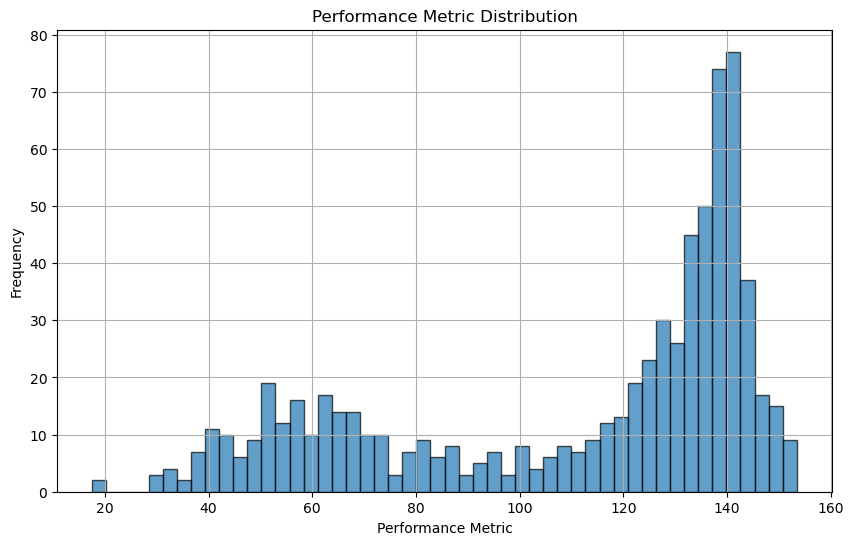

In [153]:
#Check the distribution of the performance metric
plt.figure(figsize=(10, 6))
plt.hist(plant_1['performance_metric'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Performance Metric Distribution')
plt.xlabel('Performance Metric')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Based on the distribution of the performance metric, quantiles can be used to categorize the performance into distinct classes. This approach helps in identifying meaningful thresholds for classification.

In [154]:
quantile_1 = plant_1['performance_metric'].quantile(0.33)
quantile_2 = plant_1['performance_metric'].quantile(0.67)

#Define performance classes
def classify_performance(performance_metric):
    if performance_metric <= quantile_1:
        return 'low'
    elif performance_metric <= quantile_2:
        return 'medium'
    else:
        return 'high'

#Apply classification
plant_1['performance_class'] = plant_1['performance_metric'].apply(classify_performance)


In [155]:
plant_1['performance_class'].value_counts()

medium    244
low       236
high      236
Name: performance_class, dtype: int64

Classify the performance of solar panels into 'low', 'medium', and 'high' using features such as ambient temperature, module temperature, daily yield, and total yield.

# Multinomial Logistic Regression

Multinomial Logistic Regression is used for multi-class classification problems where the dependent variable has three or more categories. This method models the probability of each class using multiple logistic functions.

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

X = plant_1[['ambient_temperature', 'module_temperature', 'daily_yield',  'total_yield']]
y = plant_1['performance_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state=42, max_iter=10000, multi_class='multinomial')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 11 75]
 [ 0 18 43]
 [ 0  8 60]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        86
         low       0.49      0.30      0.37        61
      medium       0.34      0.88      0.49        68

    accuracy                           0.36       215
   macro avg       0.27      0.39      0.29       215
weighted avg       0.24      0.36      0.26       215



# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a classification method used to find a linear combination of features that best separates two or more classes of objects or events. It is particularly useful for classification problems with more than two classes and works by modeling the differences between the classes.

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  0 44]
 [ 2 54  5]
 [10  6 52]]
              precision    recall  f1-score   support

        high       0.78      0.49      0.60        86
         low       0.90      0.89      0.89        61
      medium       0.51      0.76      0.62        68

    accuracy                           0.69       215
   macro avg       0.73      0.71      0.70       215
weighted avg       0.73      0.69      0.69       215



# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric classification algorithm used to assign a class to a sample based on the majority class of its k nearest neighbors in the feature space. It is effective for problems where the decision boundary is not linear and can be easily implemented and understood.

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  #Modify n_neighbors to experiment with different values ​​of k
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45 10 31]
 [11 45  5]
 [15 16 37]]
              precision    recall  f1-score   support

        high       0.63      0.52      0.57        86
         low       0.63      0.74      0.68        61
      medium       0.51      0.54      0.52        68

    accuracy                           0.59       215
   macro avg       0.59      0.60      0.59       215
weighted avg       0.59      0.59      0.59       215



Optimizing K-Nearest Neighbors (KNN): Choosing the optimal number of neighbors (k) is crucial for the performance of the K-Nearest Neighbors algorithm. In this section, we evaluate the model for different values of k to identify the one that minimizes the error on the test set.

In [159]:
#List of K values ​​to test
k_values = range(1, 51)
training_errors = []
test_errors = []

#Training and evaluating the KNN model for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

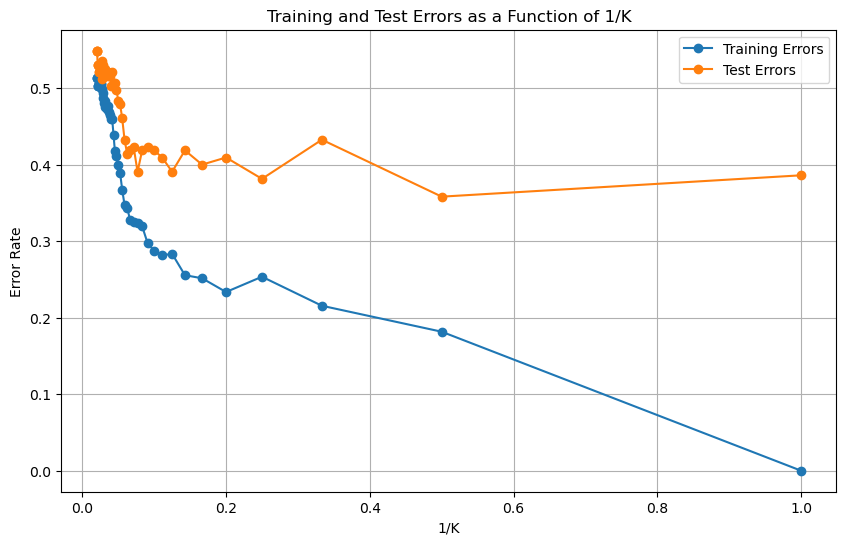

In [160]:
plt.figure(figsize=(10, 6))
plt.plot([1/k for k in k_values], training_errors, label='Training Errors', marker='o')
plt.plot([1/k for k in k_values], test_errors, label='Test Errors', marker='o')
plt.xlabel('1/K')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors as a Function of 1/K')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
#Find the value of K for which the test error is minimum
min_test_error = min(test_errors)
optimal_k = k_values[test_errors.index(min_test_error)]
print(f'Il valore ottimale di K è {optimal_k} con un test error di {min_test_error:.4f}')

Il valore ottimale di K è 2 con un test error di 0.3581


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors = optimal_k)  #Modify n_neighbors to experiment with different values ​​of k
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  5 13]
 [12 48  1]
 [29 17 22]]
              precision    recall  f1-score   support

        high       0.62      0.79      0.70        86
         low       0.69      0.79      0.73        61
      medium       0.61      0.32      0.42        68

    accuracy                           0.64       215
   macro avg       0.64      0.63      0.62       215
weighted avg       0.64      0.64      0.62       215



# Random Forest in Classification

Random Forest is an ensemble learning method that is highly effective for classification tasks. It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each individual tree in a random forest spits out a class prediction, and the class with the most votes becomes the model’s prediction.

In [163]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Order of classes:", rf.classes_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Order of classes: ['high' 'low' 'medium']
[[68  3 15]
 [ 1 56  4]
 [13  3 52]]
              precision    recall  f1-score   support

        high       0.83      0.79      0.81        86
         low       0.90      0.92      0.91        61
      medium       0.73      0.76      0.75        68

    accuracy                           0.82       215
   macro avg       0.82      0.82      0.82       215
weighted avg       0.82      0.82      0.82       215

